In [96]:
import pandas as pd
import numpy as np

import seaborn as sns 
sns.set(style="white")

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('ggplot')

import warnings 
warnings.filterwarnings("ignore")

import eda_functions as eda

### Read in the data

In [2]:
pd.set_option('display.max.columns', None)

In [3]:
df = pd.read_csv("/Users/kevintomas/Desktop/nf-sep-20/capstone-ZEIT-2020-ds/clean_wo_outliers.csv")

In [4]:
df.shape

(156982, 170)

In [5]:
df.head()

,Unnamed: 0,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,plz_2,plz_3,ort,metropole,land_iso_code,shop_kauf,unterbrechung,anrede,titel,avg_churn,email_am_kunden,zon_che_opt_in,zon_sit_opt_in,zon_zp_grey,zon_premium,zon_boa,zon_kommentar,zon_sonstige,zon_zp_red,zon_rawr,zon_community,zon_app_sonstige,zon_schach,zon_blog_kommentare,zon_quiz,cnt_abo,cnt_abo_diezeit,cnt_abo_diezeit_digital,cnt_abo_magazin,cnt_umwandlungsstatus2_dkey,abo_registrierung_min,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum,boa_reg,che_reg,sit_reg,sso_reg,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,openedanzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,openedanzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,received_anzahl_produktnews_1w,received_anzahl_produktnews_1m,received_anzahl_produktnews_3m,received_anzahl_produktnews_6m,opened_anzahl_produktnews_1w,opened_anzahl_produktnews_1m,opened_anzahl_produktnews_3m,openedanzahl_produktnews_6m,clicked_anzahl_produktnews_1w,clicked_anzahl_produktnews_1m,clicked_anzahl_produktnews_3m,clicked_anzahl_produktnews_6m,unsubscribed_anzahl_produktnews_1w,unsubscribed_anzahl_produktnews_1m,unsubscribed_anzahl_produktnews_3m,unsubscribed_anzahl_produktnews_6m,openrate_produktnews_1w,clickrate_produktnews_1w,openrate_produktnews_1m,clickrate_produktnews_1m,openrate_produktnews_3m,clickrate_produktnews_3m,received_anzahl_hamburg_1w,received_anzahl_hamburg_1m,received_anzahl_hamburg_3m,received_anzahl_hamburg_6m,opened_anzahl_hamburg_1w,opened_anzahl_hamburg_1m,opened_anzahl_hamburg_3m,openedanzahl_hamburg_6m,clicked_anzahl_hamburg_1w,clicked_anzahl_hamburg_1m,clicked_anzahl_hamburg_3m,clicked_anzahl_hamburg_6m,unsubscribed_anzahl_hamburg_1w,unsubscribed_anzahl_hamburg_1m,unsubscribed_anzahl_hamburg_3m,unsubscribed_anzahl_hamburg_6m,openrate_hamburg_1w,clickrate_hamburg_1w,openrate_hamburg_1m,clickrate_hamburg_1m,openrate_hamburg_3m,clickrate_hamburg_3m,received_anzahl_zeitbrief_1w,received_anzahl_zeitbrief_1m,received_anzahl_zeitbrief_3m,received_anzahl_zeitbrief_6m,opened_anzahl_zeitbrief_1w,opened_anzahl_zeitbrief_1m,opened_anzahl_zeitbrief_3m,openedanzahl_zeitbrief_6m,clicked_anzahl_zeitbrief_1w,clicked_anzahl_zeitbrief_1m,clicked_anzahl_zeitbrief_3m,clicked_anzahl_zeitbrief_6m,unsubscribed_anzahl_zeitbrief_1w,unsubscribed_anzahl_zeitbrief_1m,unsubscribed_anzahl_zeitbrief_3m,unsubscribed_anzahl_zeitbrief_6m,openrate_zeitbrief_1w,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
0,0,2013-10-02,andere,ZEIT Digital,Probeabo,jährlich,68,0,Bankeinzug,0,6,64,647,Erbach,0,DE,4,0,Frau,akademischer Titel,0.133879,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,2,2,2005-01-27 07:53:59,2,2,0,0,0,1,14,2005-09-30 00:00:00,0,0,0,0,0,1,6,14,43,80,4,15,38,74,1,2,2,2,0,0,0,0,0.67,0.25,1.07,0.13,0.88,0.05,0,0,0

```auftrag_new_id``` --> Apparently, for one subscription several ```auftrag_new_id``` can be created.<br/>
```zon-columns``` --> These zon-columns (ZeitOnline) are independant from the subscrition itself (you can be a subscripter and not be registered for ZeitOnline services)<br/>
```cnt-columns``` --> This is the total amount of abos per user. You could for example get a new subscritpion for "Zeit Digital" but already be subscriptor of "Die Zeit" and "Zeit Magazin". If ```cnt_abo == 0``` it means, that except for the new subscription, no further subscriptions exist. <br/>
```nl-columns``` --> Count of registrations for the newsletters. In this dataset, not all newsletters are included. This explains the difference between the sum of ```nl_zeitbrief,nl_zeitshop and nl_zeitverlag_hamburg``` and ```nl_aktivitaet```<br/>
```reg-columns``` --> Count of registrations for these services. Independant from the features before

### Check for missing values

In [6]:
df.isnull().sum().sort_values()[::-1][:5]

kuendigungs_eingangs_datum    108720
date_x                             0
boa_reg                            0
opened_anzahl_1w                   0
received_anzahl_6m                 0
dtype: int64

### Check for duplicates

In [7]:
df_temp = df
df_temp = df_temp.drop("Unnamed: 0", axis=1)

In [8]:
df_temp_duplicates = df_temp[df_temp.duplicated()]
df_temp_duplicates.shape

(0, 169)

## Auftragsdauer (muss noch an andere Stelle)

In [9]:
df.lesedauer.describe()

count    156982.000000
mean         31.786581
std          21.480402
min           0.000000
25%          13.000000
50%          26.000000
75%          46.000000
max          88.000000
Name: lesedauer, dtype: float64

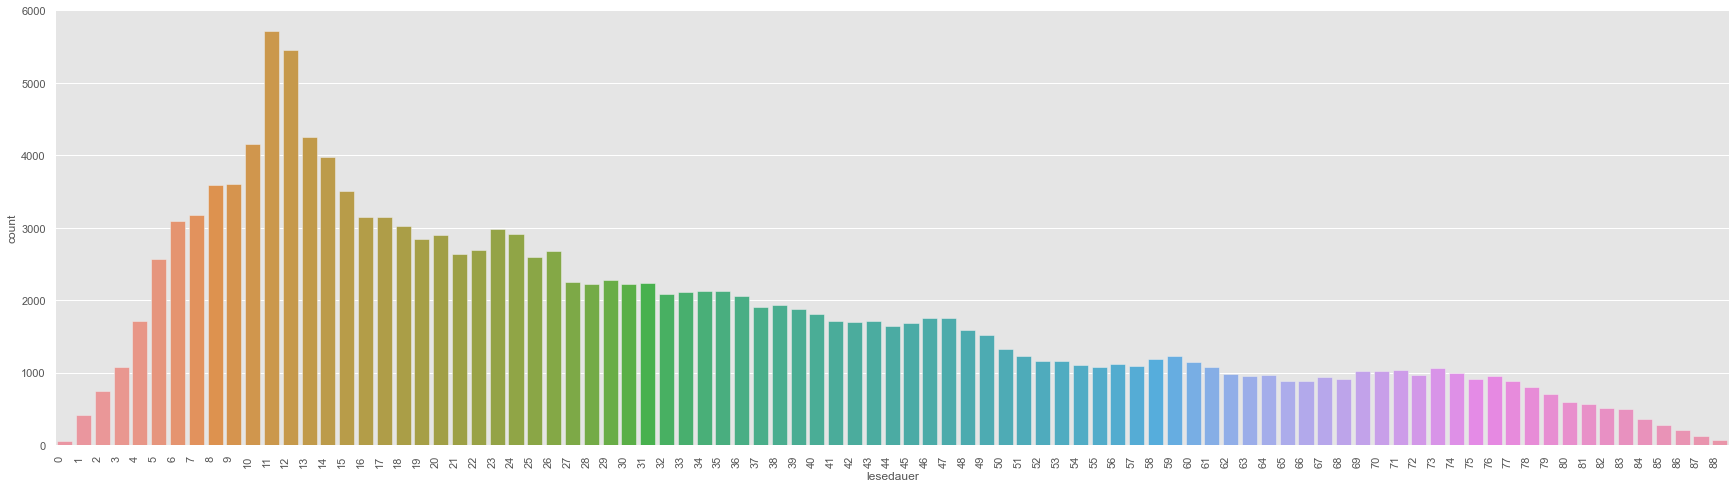

In [10]:
plt.figure(figsize=(30,8))
f = sns.countplot(x=df.lesedauer, data=df);
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");

## Feature Engineering (muss auch an andere Stelle noch)

1. Time between abo_registration and nl-registration for identifing new customers

In [139]:
'''def time_difference(first, second):
    return first-second'''

In [11]:
df["abo_registrierung_min_2"] = df.abo_registrierung_min.apply(lambda x: pd.to_datetime(x.split()[0]))
df["liefer_beginn_evt_2"] = df["liefer_beginn_evt"].apply(lambda x: pd.to_datetime(x))

In [12]:
df["difference_btw_reg_and_lieferbeginn"] = df.apply(lambda x: eda.time_difference(x["abo_registrierung_min_2"], x["liefer_beginn_evt_2"]), axis=1)

We will put the threshold at 31 days. It means that a customers will be considered being a new customer, if the time between first registration for the ZEIT and the delivery (```liefer_beginn_evt```) is max 31 days. As we cann below, this can be applied for 27.403 customers

In [13]:
df.query("difference_btw_reg_and_lieferbeginn > '-32 days'").shape

(27403, 173)

In [14]:
df.query("difference_btw_reg_and_lieferbeginn > '0 days'").shape

(32, 173)

Since ```abo_registrierung_min``` desccribe the beginning of the first subscription, it doesn't make sense that we have a positive difference of ```abo_registrierung_min``` and ```liefer_beginn_evt```. This would mean, that the object of subscription was delivered before the registration for the subscription took place. This can be observed for 32 rows.

In [15]:
df["new_customer"] = df["difference_btw_reg_and_lieferbeginn"].apply(lambda x: 1 if x.days>-32  and x.days<1  else 0)

In [16]:
df.new_customer.value_counts()

0    129611
1     27371
Name: new_customer, dtype: int64

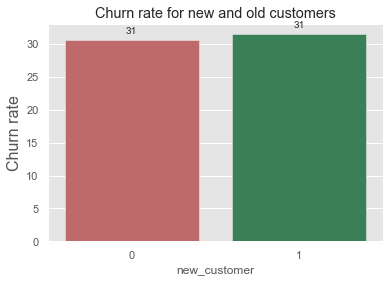

In [19]:
custom_palette_zon = ["indianred", "seagreen"]
crosstab= eda.make_crosstab(df, "new_customer") 
g = sns.barplot(data=crosstab, x="new_customer", y="True_per", palette=custom_palette_zon)
g.set_ylabel("Churn rate", size=16)
eda.add_count(g)
plt.title(f"Churn rate for new and old customers")
plt.show()

### Split the data

Here, I will only consider the part of the data, which I am responsible for. This contains the ```demografics, the ZeitOnline columns, the cnt_columns, the Newsletter columns and the registration columns```

In [20]:
cols = [i for i in range(57,168)]

In [21]:
data = df.drop(df.columns[cols],axis=1)

In [22]:
data.columns

Index(['Unnamed: 0', 'liefer_beginn_evt', 'kanal', 'objekt_name',
       'aboform_name', 'zahlung_rhythmus_name', 'lesedauer', 'rechnungsmonat',
       'zahlung_weg_name', 'studentenabo', 'plz_1', 'plz_2', 'plz_3', 'ort',
       'metropole', 'land_iso_code', 'shop_kauf', 'unterbrechung', 'anrede',
       'titel', 'avg_churn', 'email_am_kunden', 'zon_che_opt_in',
       'zon_sit_opt_in', 'zon_zp_grey', 'zon_premium', 'zon_boa',
       'zon_kommentar', 'zon_sonstige', 'zon_zp_red', 'zon_rawr',
       'zon_community', 'zon_app_sonstige', 'zon_schach',
       'zon_blog_kommentare', 'zon_quiz', 'cnt_abo', 'cnt_abo_diezeit',
       'cnt_abo_diezeit_digital', 'cnt_abo_magazin',
       'cnt_umwandlungsstatus2_dkey', 'abo_registrierung_min', 'nl_zeitbrief',
       'nl_zeitshop', 'nl_zeitverlag_hamburg', 'nl_fdz_organisch',
       'nl_blacklist_sum', 'nl_bounced_sum', 'nl_aktivitaet',
       'nl_registrierung_min', 'nl_sperrliste_sum', 'nl_opt_in_sum', 'boa_reg',
       'che_reg', 'sit_reg', 'ss

In [23]:
data = data.drop(["Unnamed: 0", "date_x", "avg_churn"], axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156982 entries, 0 to 156981
Data columns (total 60 columns):
 #   Column                               Non-Null Count   Dtype          
---  ------                               --------------   -----          
 0   liefer_beginn_evt                    156982 non-null  object         
 1   kanal                                156982 non-null  object         
 2   objekt_name                          156982 non-null  object         
 3   aboform_name                         156982 non-null  object         
 4   zahlung_rhythmus_name                156982 non-null  object         
 5   lesedauer                            156982 non-null  int64          
 6   rechnungsmonat                       156982 non-null  int64          
 7   zahlung_weg_name                     156982 non-null  object         
 8   studentenabo                         156982 non-null  int64          
 9   plz_1                                156982 non-null  objec

Here, seperate dataframes for different acitivites will be created

In [25]:
data_demografics = data.iloc[:, :20]
data_zon = data.iloc[:, 20:34]
data_cnt = data.iloc[:, 34:40]
data_nl = data.iloc[:, 40:50]
data_reg = data.iloc[:, 50:54]

### ZON-Data

This data shows, in which of these services a user firstly registrated. Values differ from 0 to 2.<br/> ```0 = not available```<br/> ```1 = not finished``` <br/> ```2 = Registration confirmed```


In [26]:
data_zon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156982 entries, 0 to 156981
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   zon_che_opt_in       156982 non-null  int64
 1   zon_sit_opt_in       156982 non-null  int64
 2   zon_zp_grey          156982 non-null  int64
 3   zon_premium          156982 non-null  int64
 4   zon_boa              156982 non-null  int64
 5   zon_kommentar        156982 non-null  int64
 6   zon_sonstige         156982 non-null  int64
 7   zon_zp_red           156982 non-null  int64
 8   zon_rawr             156982 non-null  int64
 9   zon_community        156982 non-null  int64
 10  zon_app_sonstige     156982 non-null  int64
 11  zon_schach           156982 non-null  int64
 12  zon_blog_kommentare  156982 non-null  int64
 13  zon_quiz             156982 non-null  int64
dtypes: int64(14)
memory usage: 16.8 MB


In [27]:
def add_count(plot):
    '''adds counts to bar and count plots'''
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

In [32]:
def value_counts_perc(df, column):
    value_counts = df[column].value_counts()
    
    perc = []
    for i in value_counts:
        perc.append(str(round(i/sum(value_counts)*100,2)))
    
    return perc

In [33]:
def make_crosstab(df, col):
    crosstab = pd.crosstab(df[col],[df["churn"]])
    crosstab.reset_index(level=0, inplace=True)
    crosstab["False_per"]= crosstab[False].div(crosstab[False]+crosstab[True]).multiply(100)
    crosstab["True_per"]= crosstab[True].div(crosstab[False]+crosstab[True]).multiply(100)
    crosstab.drop([False, True], axis=1, inplace=True) 
    return crosstab

**ZON-Columns and churn**

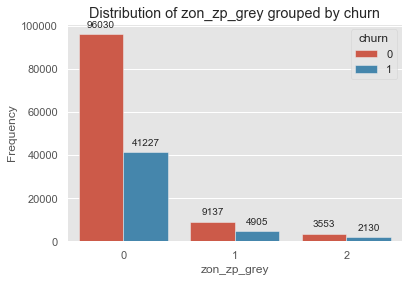

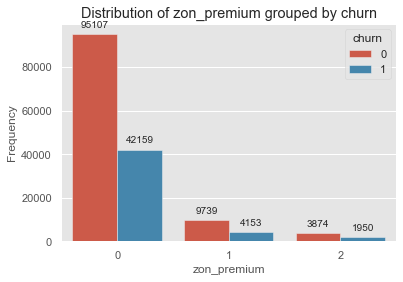

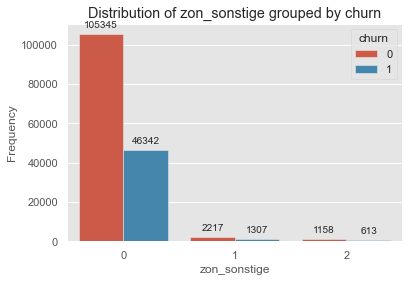

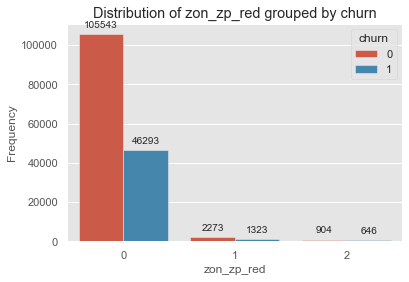

In [28]:
relevant = ["zon_zp_grey", "zon_premium", "zon_sonstige", "zon_zp_red"]
for i in relevant: 
    ax = sns.countplot(x=i, data=data, hue="churn") 
    ax.set(xlabel=i, ylabel="Frequency", xlim=[-0.5, 2.5]) 
    eda.add_count(ax)
    plt.title(f"Distribution of {i} grouped by churn")
    plt.show()

Only for ```zon_zp_grey```, ```zon_premium```, ```zon_sonstige``` and ```zon_zp_red``` a relevant percentage of registrations can be found. The other columns here don't have any valuable information.<br/><br/> Accoriding to the graphs above, most of the users don't register with any serives in the ZEITONline services

Let's inspect, if there the registration to these services has an impact on the churn rate:

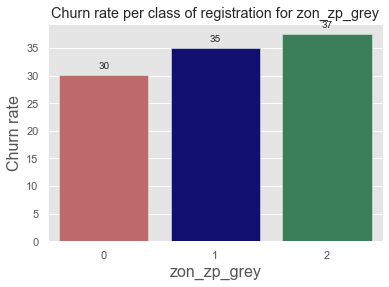

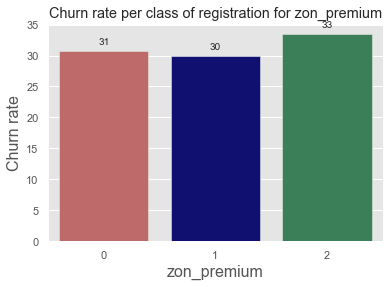

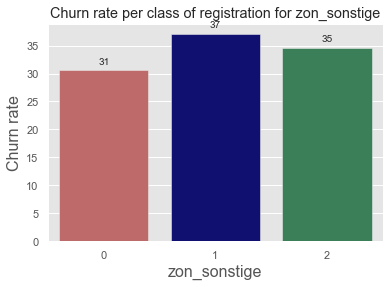

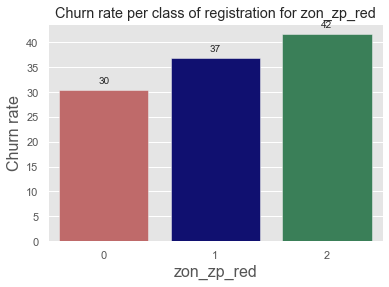

In [29]:
relevant = ["zon_zp_grey", "zon_premium", "zon_sonstige", "zon_zp_red"]
for i in relevant: 
    custom_palette_zon = ["indianred", "navy", "seagreen"]
    crosstab= eda.make_crosstab(data, i) 
    g = sns.barplot(data=crosstab, x=i, y="True_per", palette=custom_palette_zon)
    g.set_xlabel(i, size=16)
    g.set_ylabel("Churn rate", size=16)
    eda.add_count(g)
    plt.title(f"Churn rate per class of registration for {i}")
    plt.show()

There doesn't seem to be a consistent link between the registrations and the number of churns. For ```zon_zp_grey``` for example, the churn rates is the lowest for the non-registered users and the highest for these, who completed the registration (same for ```zon_zp_red```). <br/><br/> Another interesting finding here is, that for every feature here, the churn rate for non-registered users are lower than for the users, who completed the registration.<br/><br/> For the modelling part, it is good news that the churn rate differs for the different features here.

**Putting ```0```and ```1```into one variable**

In [31]:
data_zon_alternative = df
for i in data_zon.columns:
    data_zon_alternative[i] = df[i].apply(lambda x: 0 if x==0 or x==1 else 1)

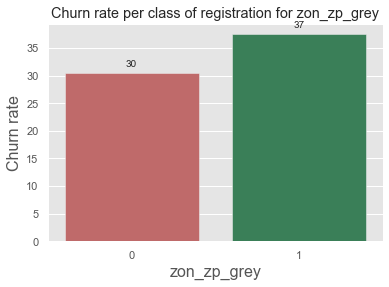

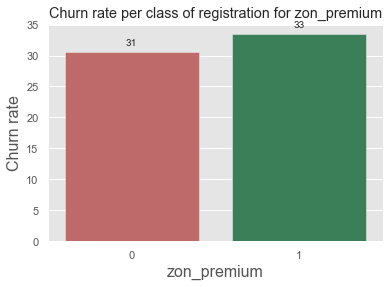

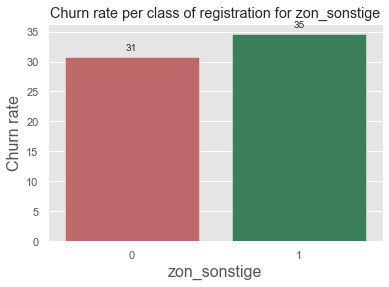

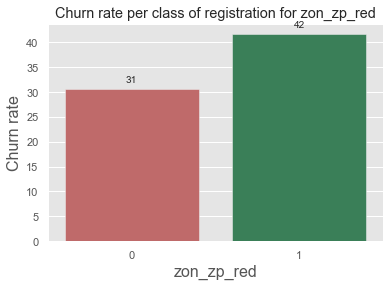

In [32]:
relevant = ["zon_zp_grey", "zon_premium", "zon_sonstige", "zon_zp_red"]
for i in relevant: 
    custom_palette_zon = ["indianred", "seagreen"]
    crosstab= eda.make_crosstab(data_zon_alternative, i) 
    g = sns.barplot(data=crosstab, x=i, y="True_per", palette=custom_palette_zon)
    g.set_xlabel(i, size=16)
    g.set_ylabel("Churn rate", size=16)
    eda.add_count(g)
    plt.title(f"Churn rate per class of registration for {i}")
    plt.show()

If we do this feature engineering, the highest differnece in churn rate can bee seen for ```zon_zp_pred``` followed by ```zon_zp_grey```

**ZON_Columns and Object_name**

Here, we use again the "old" encoding for the ```zon-columns```

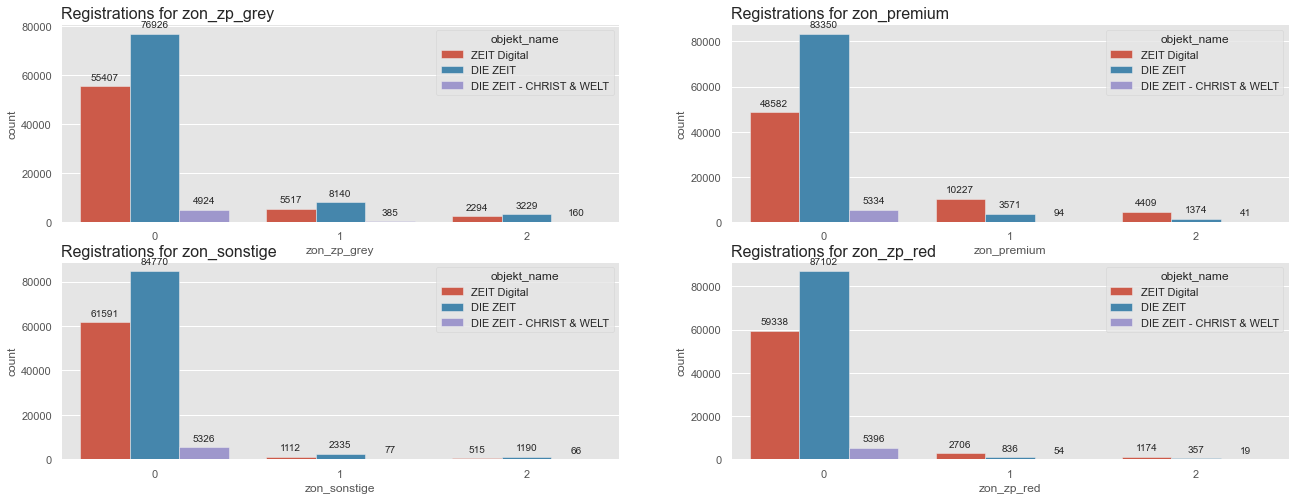

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(22, 8))
f1 = sns.countplot(x=data.zon_zp_grey, hue=data["objekt_name"], data=data, ax=axes[0,0]);
f1.set_title("Registrations for zon_zp_grey", fontsize=16, loc="left");
f1.set_xticklabels(["0", "1", "2"]);
eda.add_count(f1)

f2 = sns.countplot(x=data.zon_premium, hue=data["objekt_name"], data=data, ax=axes[0,1]);
f2.set_title("Registrations for zon_premium", fontsize=16, loc="left");
f2.set_xticklabels(["0", "1", "2"]);
eda.add_count(f2)

f3 = sns.countplot(x=data.zon_sonstige, hue=data["objekt_name"], data=data, ax=axes[1,0]);
f3.set_title("Registrations for zon_sonstige", fontsize=16, loc="left");
f3.set_xticklabels(["0", "1", "2"]);
eda.add_count(f3)

f4 = sns.countplot(x=data.zon_zp_red, hue=data["objekt_name"], data=data, ax=axes[1,1]);
f4.set_title("Registrations for zon_zp_red", fontsize=16, loc="left");
f4.set_xticklabels(["0", "1", "2"]);
eda.add_count(f4)

```zon_premium and zon_zp_pred``` --> It is interesting that the distribution for the classes 0,1 and 3 change. 

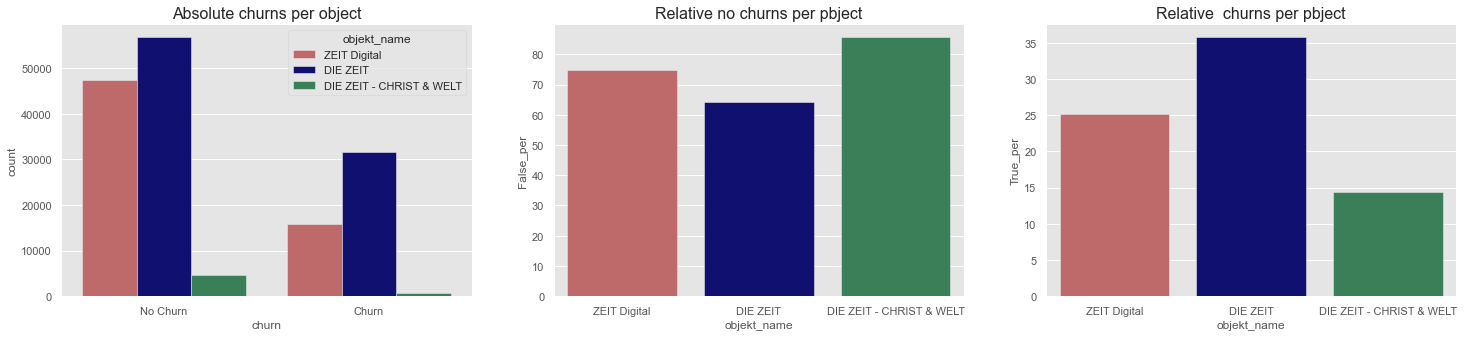

In [34]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))
custom_palette_zon = ["indianred", "navy", "seagreen"]
crosstab_object_name = eda.make_crosstab(df, "objekt_name")  
crosstab_object_name = crosstab_object_name.reindex([2, 0,1])

f1 = sns.countplot(x=data.churn, hue=data["objekt_name"], data=data,palette=custom_palette_zon, ax=axes[0]);
f1.set_title("Absolute churns per object", fontsize=16);
f1.set_xticklabels(["No Churn", "Churn"]);

f2 = sns.barplot(data=crosstab_object_name, x="objekt_name", y="False_per", palette=custom_palette_zon, ax=axes[1])
f2.set_title("Relative no churns per pbject", fontsize=16);

f3 = sns.barplot(data=crosstab_object_name, x="objekt_name", y="True_per", palette=custom_palette_zon, ax=axes[2])
f3.set_title("Relative  churns per pbject", fontsize=16);

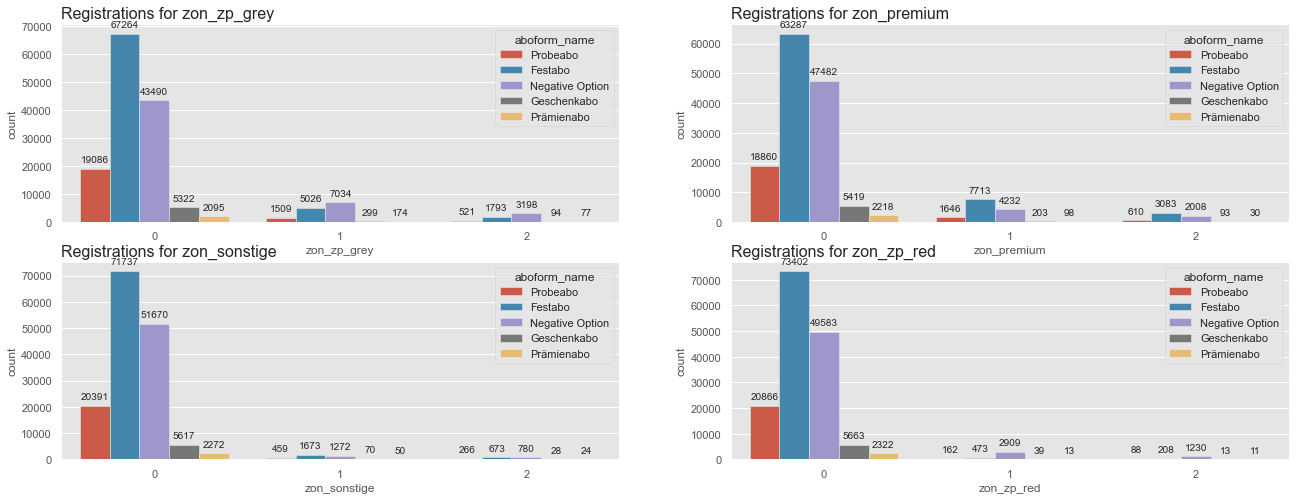

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(22, 8))
f1 = sns.countplot(x=data.zon_zp_grey, hue=data["aboform_name"], data=data, ax=axes[0,0]);
f1.set_title("Registrations for zon_zp_grey", fontsize=16, loc="left");
f1.set_xticklabels(["0", "1", "2"]);
eda.add_count(f1)


f2 = sns.countplot(x=data.zon_premium, hue=data["aboform_name"], data=data, ax=axes[0,1]);
f2.set_title("Registrations for zon_premium", fontsize=16, loc="left");
f2.set_xticklabels(["0", "1", "2"]);
eda.add_count(f2)

f3 = sns.countplot(x=data.zon_sonstige, hue=data["aboform_name"], data=data, ax=axes[1,0]);
f3.set_title("Registrations for zon_sonstige", fontsize=16, loc="left");
f3.set_xticklabels(["0", "1", "2"]);
eda.add_count(f3)

f4 = sns.countplot(x=data.zon_zp_red, hue=data["aboform_name"], data=data, ax=axes[1,1]);
f4.set_title("Registrations for zon_zp_red", fontsize=16, loc="left");
f4.set_xticklabels(["0", "1", "2"]);
eda.add_count(f4)

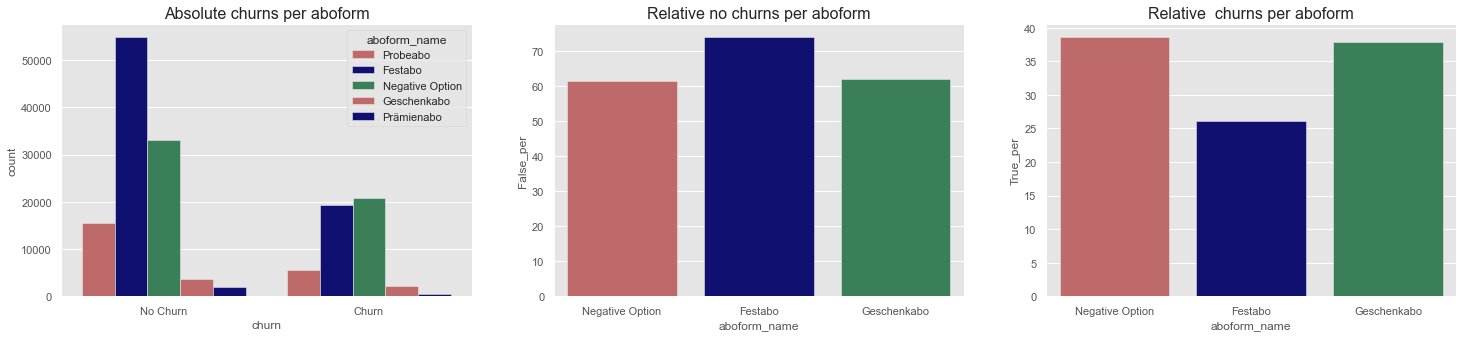

In [37]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))
custom_palette_zon = ["indianred", "navy", "seagreen"]
crosstab_aboform_name = eda.make_crosstab(df, "aboform_name")  
crosstab_aboform_name = crosstab_aboform_name.reindex([2, 0,1])

f1 = sns.countplot(x=data.churn, hue=data["aboform_name"], data=data,palette=custom_palette_zon, ax=axes[0]);
f1.set_title("Absolute churns per aboform", fontsize=16);
f1.set_xticklabels(["No Churn", "Churn"]);

f2 = sns.barplot(data=crosstab_aboform_name, x="aboform_name", y="False_per", palette=custom_palette_zon, ax=axes[1])
f2.set_title("Relative no churns per aboform", fontsize=16);

f3 = sns.barplot(data=crosstab_aboform_name, x="aboform_name", y="True_per", palette=custom_palette_zon, ax=axes[2])
f3.set_title("Relative  churns per aboform", fontsize=16);

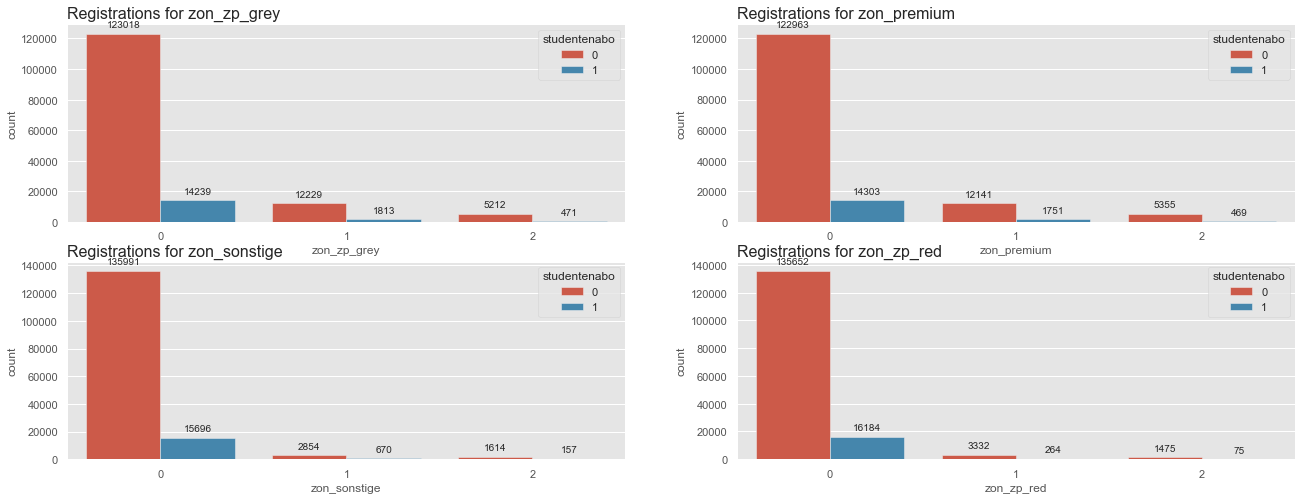

In [38]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(22, 8))
f1 = sns.countplot(x=data.zon_zp_grey, hue=data["studentenabo"], data=data, ax=axes[0,0]);
f1.set_title("Registrations for zon_zp_grey", fontsize=16, loc="left");
f1.set_xticklabels(["0", "1", "2"]);
eda.add_count(f1)

f2 = sns.countplot(x=data.zon_premium, hue=data["studentenabo"], data=data, ax=axes[0,1]);
f2.set_title("Registrations for zon_premium", fontsize=16, loc="left");
f2.set_xticklabels(["0", "1", "2"]);
eda.add_count(f2)

f3 = sns.countplot(x=data.zon_sonstige, hue=data["studentenabo"], data=data, ax=axes[1,0]);
f3.set_title("Registrations for zon_sonstige", fontsize=16, loc="left");
f3.set_xticklabels(["0", "1", "2"]);
eda.add_count(f3)

f4 = sns.countplot(x=data.zon_zp_red, hue=data["studentenabo"], data=data, ax=axes[1,1]);
f4.set_title("Registrations for zon_zp_red", fontsize=16, loc="left");
f4.set_xticklabels(["0", "1", "2"]);
eda.add_count(f4)

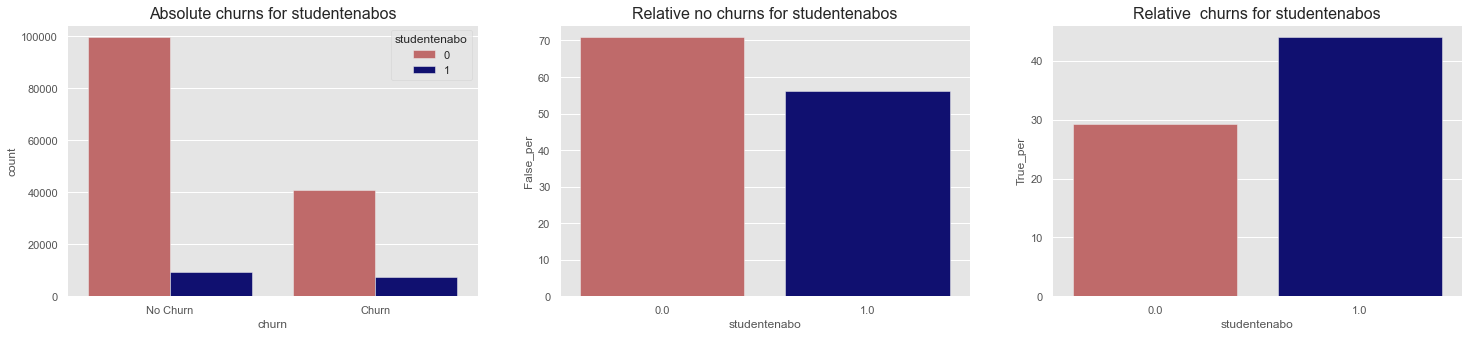

In [39]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))
custom_palette_zon = ["indianred", "navy", "seagreen"]
crosstab_student = eda.make_crosstab(df, "studentenabo")  
crosstab_student = crosstab_student.reindex([2, 0,1])

f1 = sns.countplot(x=data.churn, hue=data["studentenabo"], data=data,palette=custom_palette_zon, ax=axes[0]);
f1.set_title("Absolute churns for studentenabos", fontsize=16);
f1.set_xticklabels(["No Churn", "Churn"]);

f2 = sns.barplot(data=crosstab_student, x="studentenabo", y="False_per", palette=custom_palette_zon, ax=axes[1])
f2.set_title("Relative no churns for studentenabos", fontsize=16);

f3 = sns.barplot(data=crosstab_student, x="studentenabo", y="True_per", palette=custom_palette_zon, ax=axes[2])
f3.set_title("Relative  churns for studentenabos", fontsize=16);

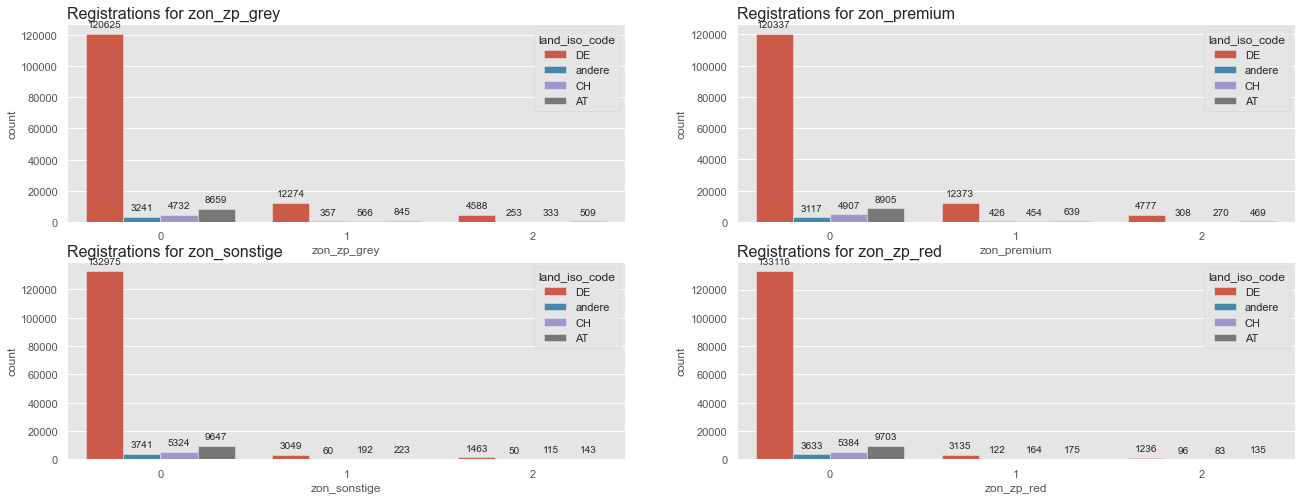

In [40]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(22, 8))
f1 = sns.countplot(x=data.zon_zp_grey, hue=data["land_iso_code"], data=data, ax=axes[0,0]);
f1.set_title("Registrations for zon_zp_grey", fontsize=16, loc="left");
f1.set_xticklabels(["0", "1", "2"]);
eda.add_count(f1)

f2 = sns.countplot(x=data.zon_premium, hue=data["land_iso_code"], data=data, ax=axes[0,1]);
f2.set_title("Registrations for zon_premium", fontsize=16, loc="left");
f2.set_xticklabels(["0", "1", "2"]);
eda.add_count(f2)

f3 = sns.countplot(x=data.zon_sonstige, hue=data["land_iso_code"], data=data, ax=axes[1,0]);
f3.set_title("Registrations for zon_sonstige", fontsize=16, loc="left");
f3.set_xticklabels(["0", "1", "2"]);
eda.add_count(f3)

f4 = sns.countplot(x=data.zon_zp_red, hue=data["land_iso_code"], data=data, ax=axes[1,1]);
f4.set_title("Registrations for zon_zp_red", fontsize=16, loc="left");
f4.set_xticklabels(["0", "1", "2"]);
eda.add_count(f4)

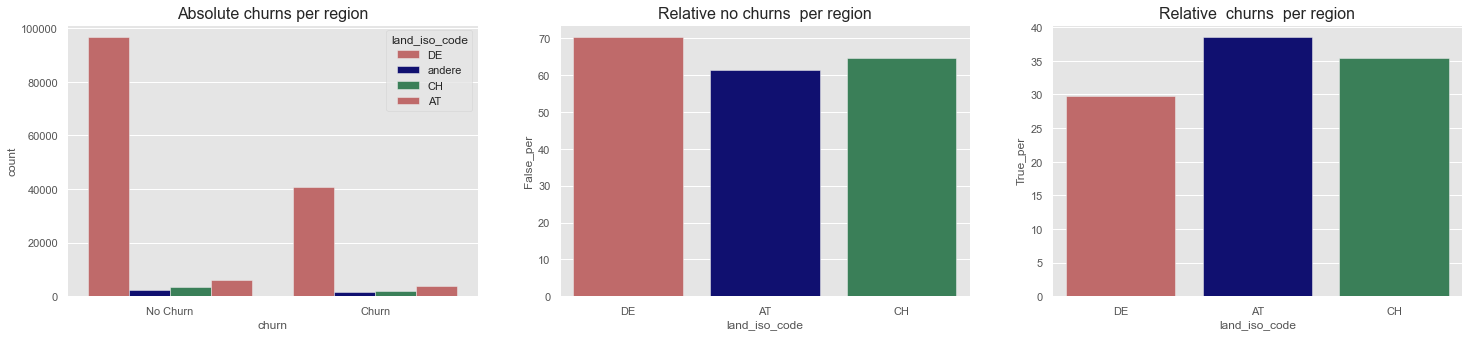

In [41]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))
custom_palette_zon = ["indianred", "navy", "seagreen"]
crosstab_land = eda.make_crosstab(df, "land_iso_code")  
crosstab_land = crosstab_land.reindex([2, 0,1])

f1 = sns.countplot(x=data.churn, hue=data["land_iso_code"], data=data,palette=custom_palette_zon, ax=axes[0]);
f1.set_title("Absolute churns per region", fontsize=16);
f1.set_xticklabels(["No Churn", "Churn"]);

f2 = sns.barplot(data=crosstab_land, x="land_iso_code", y="False_per", palette=custom_palette_zon, ax=axes[1])
f2.set_title("Relative no churns  per region", fontsize=16);

f3 = sns.barplot(data=crosstab_land, x="land_iso_code", y="True_per", palette=custom_palette_zon, ax=axes[2])
f3.set_title("Relative  churns  per region", fontsize=16);

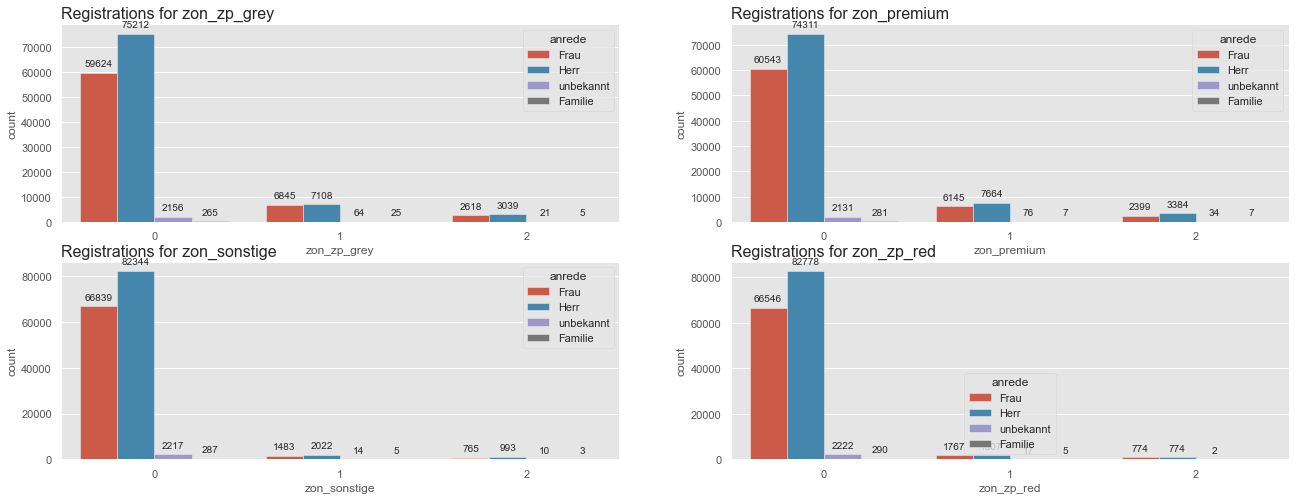

In [42]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(22, 8))
f1 = sns.countplot(x=data.zon_zp_grey, hue=data["anrede"], data=data, ax=axes[0,0]);
f1.set_title("Registrations for zon_zp_grey", fontsize=16, loc="left");
f1.set_xticklabels(["0", "1", "2"]);
eda.add_count(f1)

f2 = sns.countplot(x=data.zon_premium, hue=data["anrede"], data=data, ax=axes[0,1]);
f2.set_title("Registrations for zon_premium", fontsize=16, loc="left");
f2.set_xticklabels(["0", "1", "2"]);
eda.add_count(f2)

f3 = sns.countplot(x=data.zon_sonstige, hue=data["anrede"], data=data, ax=axes[1,0]);
f3.set_title("Registrations for zon_sonstige", fontsize=16, loc="left");
f3.set_xticklabels(["0", "1", "2"]);
eda.add_count(f3)

f4 = sns.countplot(x=data.zon_zp_red, hue=data["anrede"], data=data, ax=axes[1,1]);
f4.set_title("Registrations for zon_zp_red", fontsize=16, loc="left");
f4.set_xticklabels(["0", "1", "2"]);
eda.add_count(f4)

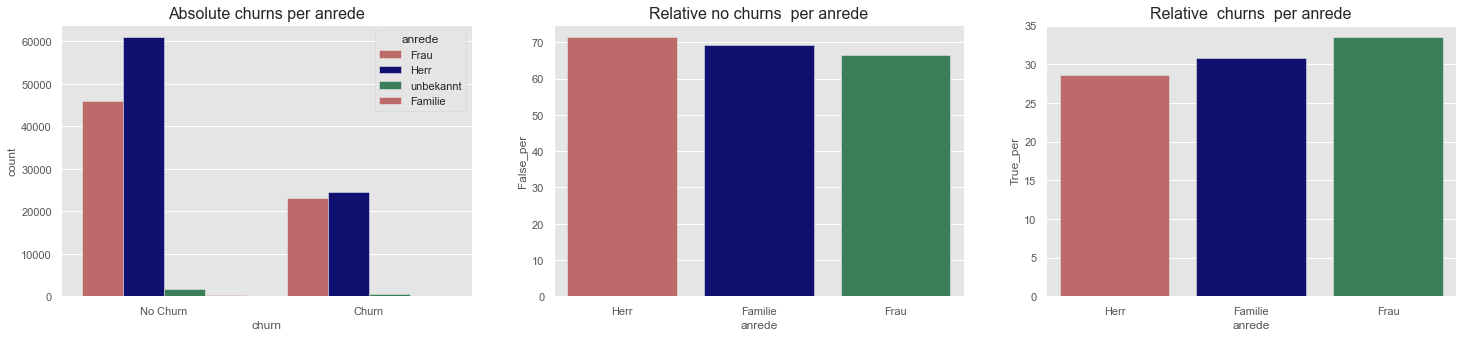

In [43]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))
custom_palette_zon = ["indianred", "navy", "seagreen"]
crosstab_anrede = eda.make_crosstab(df, "anrede")  
crosstab_anrede = crosstab_anrede.reindex([2, 0,1])

f1 = sns.countplot(x=data.churn, hue=data["anrede"], data=data,palette=custom_palette_zon, ax=axes[0]);
f1.set_title("Absolute churns per anrede", fontsize=16);
f1.set_xticklabels(["No Churn", "Churn"]);

f2 = sns.barplot(data=crosstab_anrede, x="anrede", y="False_per", palette=custom_palette_zon, ax=axes[1])
f2.set_title("Relative no churns  per anrede", fontsize=16);

f3 = sns.barplot(data=crosstab_anrede, x="anrede", y="True_per", palette=custom_palette_zon, ax=axes[2])
f3.set_title("Relative  churns  per anrede", fontsize=16);

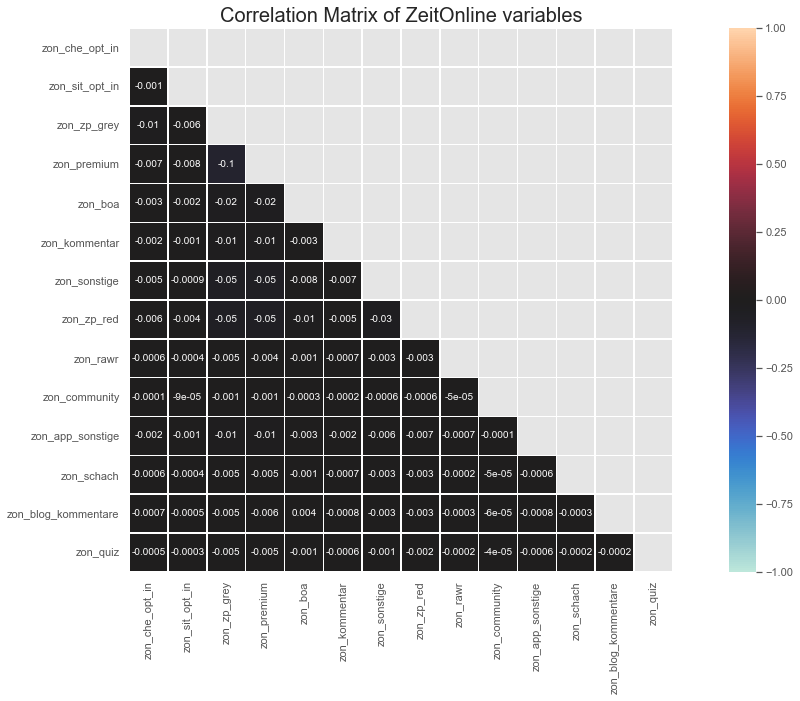

In [44]:
corr = data_zon.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True) (diverging not necessary)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, annot=True, vmin=-1, vmax=1, center= 0, fmt='.1g') #, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of ZeitOnline variables', fontsize=20)
plt.show()

### CNT-Data

The cnt features contain information of how many additional and which additional subscribtion types are held by the ```auftrag_new_id```. The column “cnt_abo” holds the sum of the other columns.


In [45]:
data_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156982 entries, 0 to 156981
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   cnt_abo                      156982 non-null  int64 
 1   cnt_abo_diezeit              156982 non-null  int64 
 2   cnt_abo_diezeit_digital      156982 non-null  int64 
 3   cnt_abo_magazin              156982 non-null  int64 
 4   cnt_umwandlungsstatus2_dkey  156982 non-null  int64 
 5   abo_registrierung_min        156982 non-null  object
dtypes: int64(5), object(1)
memory usage: 7.2+ MB


In [46]:
data_cnt.cnt_abo.describe()

count    156982.000000
mean          1.312711
std           1.881493
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: cnt_abo, dtype: float64

It seems like there are some outliers, which don't make sense.

In [47]:
data_cnt["abo_registrierung_min_YEAR"] = data_cnt["abo_registrierung_min"].apply(lambda x: x.split()[0].split("-")[0])
data_cnt = data_cnt.sort_values(by=['abo_registrierung_min_YEAR'])

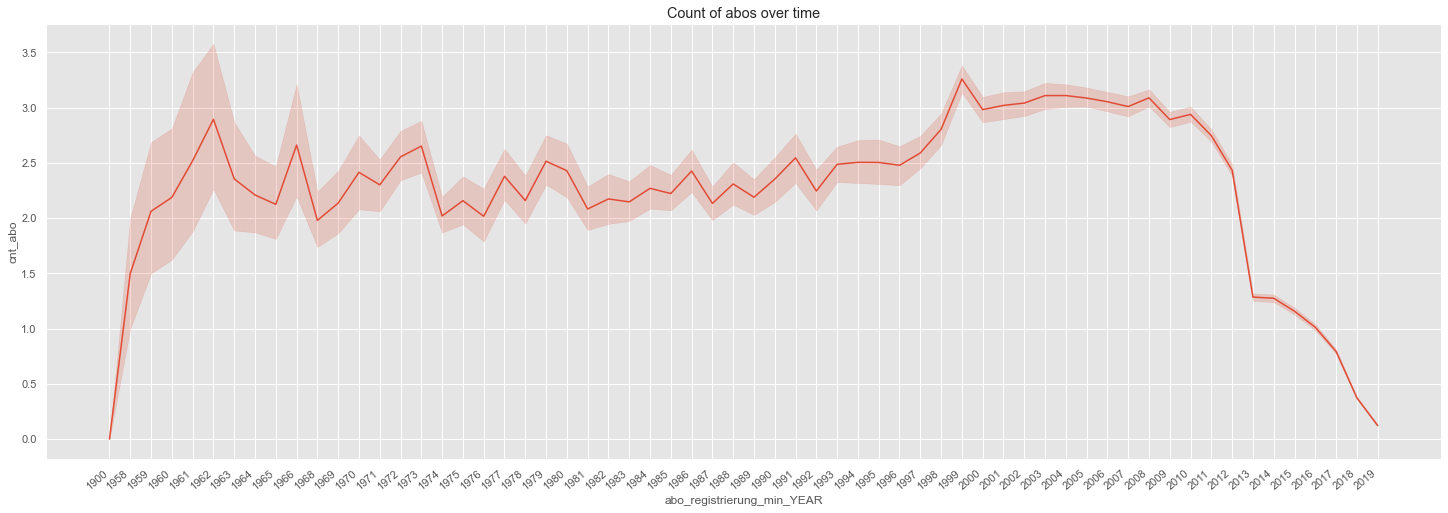

In [48]:
labels = sorted(list(set([i for i in data_cnt["abo_registrierung_min_YEAR"]])))

plt.figure(figsize=(25,8))
plt.title("Count of abos over time")
g = sns.lineplot(data=data_cnt, x="abo_registrierung_min_YEAR", y="cnt_abo")
g.set_xticklabels(labels, rotation=40, ha="right");

**Compare chrun rate for those, who have no additional subscription and who have at least one additional subscription**

In [49]:
data_cnt_alternative = df
data_cnt_alternative["more_than_one_cnt_abo"] = df["cnt_abo"].apply(lambda x: 0 if x==0 else 1)

In [54]:
#data_cnt["more_than_one_cnt_abo"] = data_cnt.cnt_abo.apply(lambda x: 0 if x==0 else 1)

In [50]:
data_cnt_alternative["more_than_one_cnt_abo"].value_counts()

1    82751
0    74231
Name: more_than_one_cnt_abo, dtype: int64

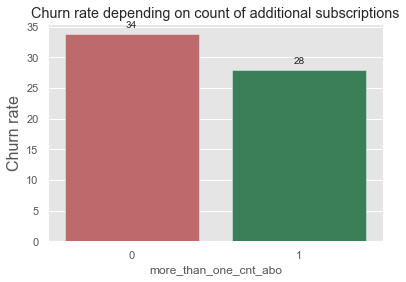

In [52]:
custom_palette_zon = ["indianred", "seagreen"]
crosstab= eda.make_crosstab(data_cnt_alternative, "more_than_one_cnt_abo")

g = sns.barplot(data=crosstab, x= "more_than_one_cnt_abo", y="True_per", palette=custom_palette_zon)
g.set_ylabel("Churn rate", size=16)
eda.add_count(g)
plt.title(f"Churn rate depending on count of additional subscriptions")
plt.show()

There is a slight differnece in the churn rate between those, who have no additional subscriptions and those who have at least one additional subscription

**cnt_umwandlungsstatus2_dkey**

Count of the subscriptions, which turned from a test to a regular subscription

In [53]:
data_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156982 entries, 94120 to 123514
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   cnt_abo                      156982 non-null  int64 
 1   cnt_abo_diezeit              156982 non-null  int64 
 2   cnt_abo_diezeit_digital      156982 non-null  int64 
 3   cnt_abo_magazin              156982 non-null  int64 
 4   cnt_umwandlungsstatus2_dkey  156982 non-null  int64 
 5   abo_registrierung_min        156982 non-null  object
 6   abo_registrierung_min_YEAR   156982 non-null  object
dtypes: int64(5), object(2)
memory usage: 9.6+ MB


Text(0.5, 1.0, "Number of 'turned' subscriptions")

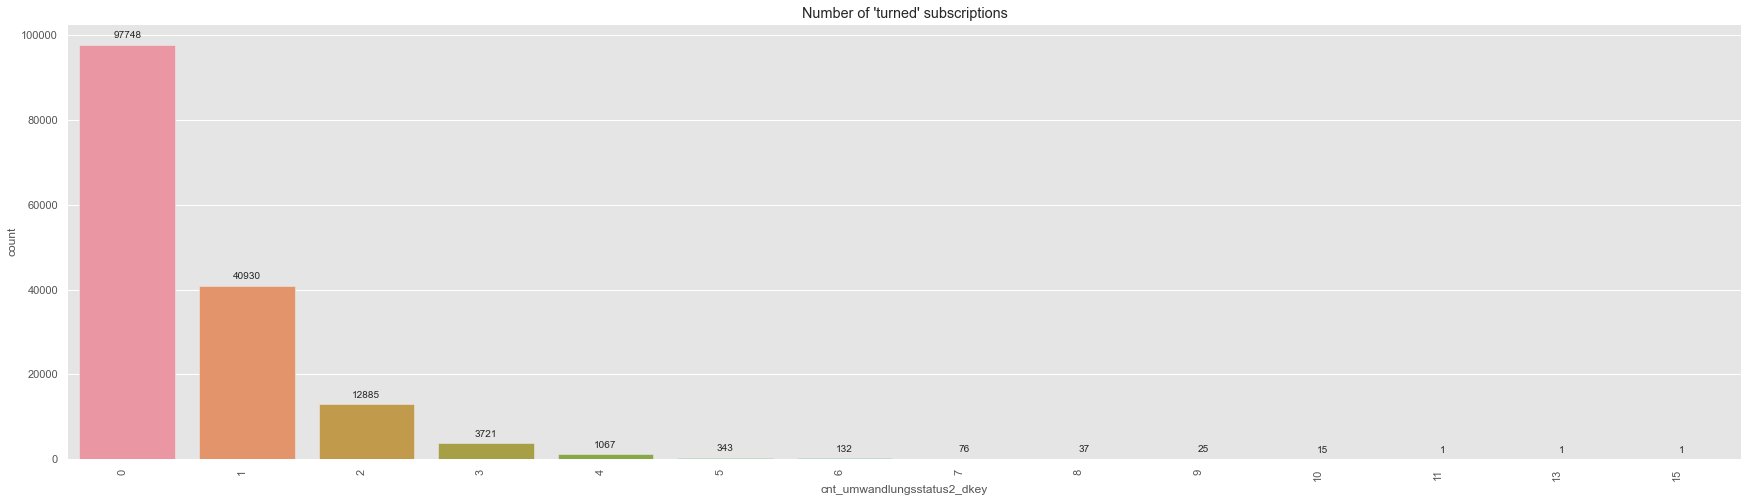

In [55]:
plt.figure(figsize=(30,8))
f = sns.countplot(x=data_cnt.cnt_umwandlungsstatus2_dkey, data=data_cnt);
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
eda.add_count(f)
plt.title(f"Number of 'turned' subscriptions")

Most of the values are in the range of 0 to 6 or 7

**Create new features out of cnt_umwandlungsstatus2_dkey**<br/> 
1. Feature, where ```cnt_umwandlungsstatus2_dkey``` == ```cnt_abos```. But only, where ```cnt_abo``` > 0
2. Feature, where ```cnt_umwandlungsstatus2_dkey``` > 0

In [59]:
'''def dkey(first, second):
    if first == second and second > 0:
        return 1
    else:
        return 0'''

In [56]:
data_cnt["cnt_dkey_equals_cnt_abo"] = data_cnt.apply(lambda x: eda.dkey(x["cnt_umwandlungsstatus2_dkey"], x["cnt_abo"]), axis=1)
data_cnt["cnt_dkey_more_than_one"] = data_cnt.cnt_umwandlungsstatus2_dkey.apply(lambda x: 1 if x >0 else 0)

In [57]:
# for plotting we need to do it like this (we need to include "churn")
data_cnt_alternative2 = df
data_cnt_alternative2["cnt_dkey_equals_cnt_abo"] = data_cnt_alternative2.apply(lambda x: eda.dkey(x["cnt_umwandlungsstatus2_dkey"], x["cnt_abo"]), axis=1)
data_cnt_alternative2["cnt_dkey_more_than_one"] = data_cnt_alternative2.cnt_umwandlungsstatus2_dkey.apply(lambda x: 1 if x >0 else 0)

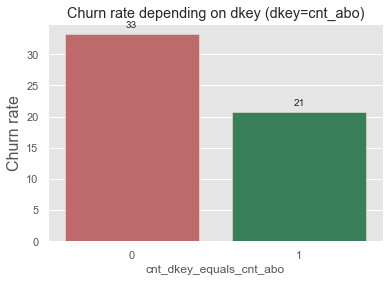

In [58]:
custom_palette_zon = ["indianred", "seagreen"]
crosstab= eda.make_crosstab(data_cnt_alternative2, "cnt_dkey_equals_cnt_abo") 
g = sns.barplot(data=crosstab, x= "cnt_dkey_equals_cnt_abo", y="True_per", palette=custom_palette_zon)
g.set_ylabel("Churn rate", size=16)
eda.add_count(g)
plt.title(f"Churn rate depending on dkey (dkey=cnt_abo)")
plt.show()

Between these two categories, we can see significant differences in the churn rate (lower where dkey=cnt_abo).

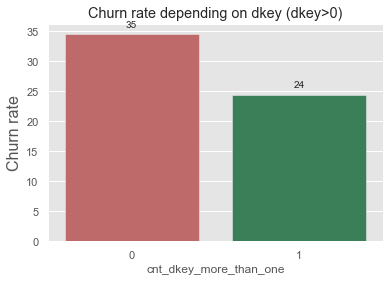

In [59]:
custom_palette_zon = ["indianred", "seagreen"]
crosstab= eda.make_crosstab(data_cnt_alternative2, "cnt_dkey_more_than_one") 
g = sns.barplot(data=crosstab, x= "cnt_dkey_more_than_one", y="True_per", palette=custom_palette_zon)
g.set_ylabel("Churn rate", size=16)
eda.add_count(g)
plt.title(f"Churn rate depending on dkey (dkey>0)")
plt.show()

Between these two categories, we can see significant differences in the churn rate (lower where dkey>0).

In [64]:
data_cnt.columns

Index(['cnt_abo', 'cnt_abo_diezeit', 'cnt_abo_diezeit_digital',
       'cnt_abo_magazin', 'cnt_umwandlungsstatus2_dkey',
       'abo_registrierung_min', 'abo_registrierung_min_YEAR',
       'cnt_dkey_equals_cnt_abo', 'cnt_dkey_more_than_one'],
      dtype='object')

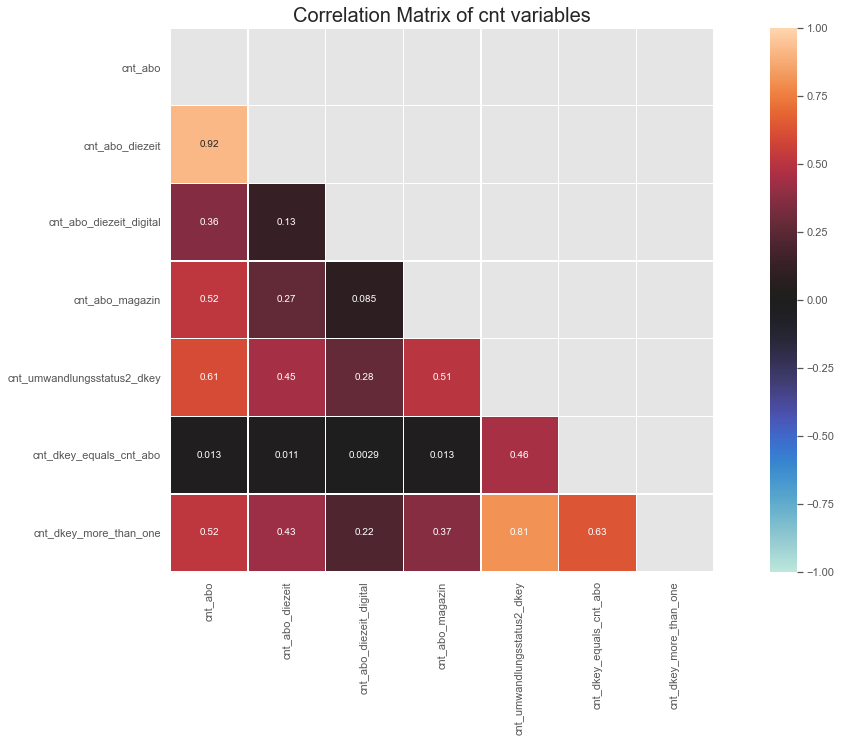

In [60]:
corr = data_cnt.drop(["abo_registrierung_min", "abo_registrierung_min_YEAR"], axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True) (diverging not necessary)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, annot=True, vmin=-1, vmax=1, center= 0) #, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of cnt variables', fontsize=20)
plt.show()

### NL-Data

This data shows, in which of these newsletters a user is registraded. Values differ from 0 to 2.<br/> ```0 = not available```<br/> ```1 = unsubscribed``` <br/> ```2 = active```<br/><br/> There are three different Newsletters: ZEITBRIEF, ZEITSHOP and ZEITVERLAG HAMBURG (ELBVERTIEFUNG)



In [61]:
data_nl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156982 entries, 0 to 156981
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   nl_zeitbrief           156982 non-null  int64 
 1   nl_zeitshop            156982 non-null  int64 
 2   nl_zeitverlag_hamburg  156982 non-null  int64 
 3   nl_fdz_organisch       156982 non-null  int64 
 4   nl_blacklist_sum       156982 non-null  int64 
 5   nl_bounced_sum         156982 non-null  int64 
 6   nl_aktivitaet          156982 non-null  int64 
 7   nl_registrierung_min   156982 non-null  object
 8   nl_sperrliste_sum      156982 non-null  int64 
 9   nl_opt_in_sum          156982 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 12.0+ MB


In [62]:
data_nl.head(5)

,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum
0,2,2,0,0,0,1,14,2005-09-30 00:00:00,0,0
1,2,0,0,0,0,0,14,2013-10-11 16:36:26,0,0
2,2,0,0,0,0,0,14,2013-08-07 21:28:19,0,0
3,2,0,0,0,0,0,16,2013-10-14 18:36:26,0,0
4,2,0,2,0,0,0,18,2013-10-13 14:53:34,0,0


**NL-Columns and churn**

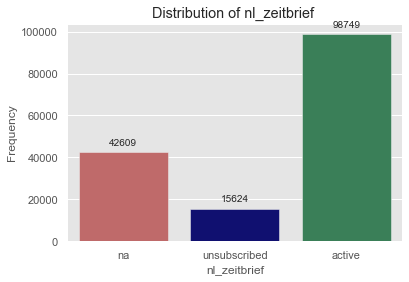

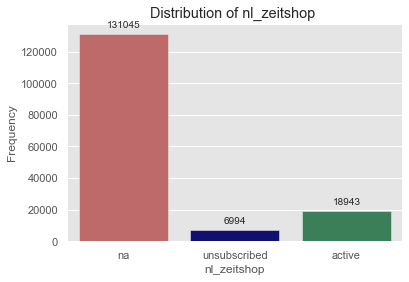

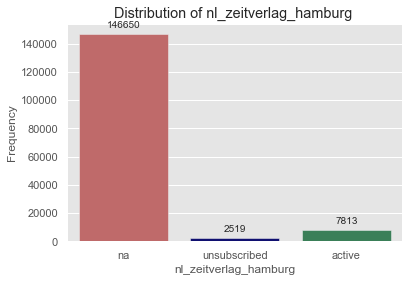

In [63]:
relevant = ["nl_zeitbrief", "nl_zeitshop", "nl_zeitverlag_hamburg"]
for i in relevant: 
    custom_palette_zon = ["indianred", "navy", "seagreen"]
    ax = sns.countplot(x=i, data=data, palette=custom_palette_zon) 
    ax.set(xlabel=i, ylabel="Frequency", xlim=[-0.5, 2.5]) 
    ax.set_xticklabels(["na", "unsubscribed", "active"])
    eda.add_count(ax)
    plt.title(f"Distribution of {i} ")
    plt.show()
    print("\n")

For the Zeitbrief-Newsletter most active users can be identified. For the other two Newsletters can be concluded that there are many users, which can't be classified ("not available").

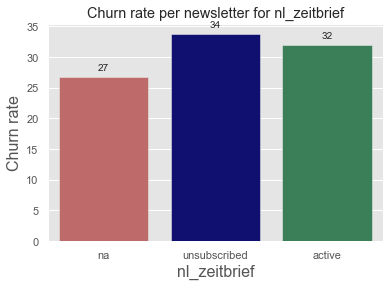

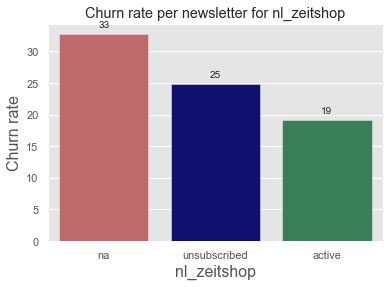

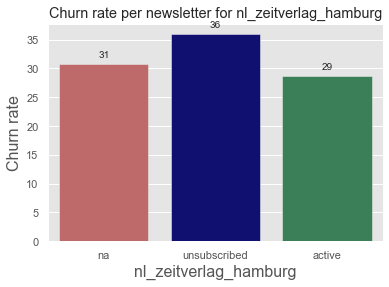

In [64]:
relevant = ["nl_zeitbrief", "nl_zeitshop", "nl_zeitverlag_hamburg"]
for i in relevant: 
    custom_palette_zon = ["indianred", "navy", "seagreen"]
    crosstab= eda.make_crosstab(data, i) 
    g = sns.barplot(data=crosstab, x=i, y="True_per", palette=custom_palette_zon)
    g.set_xlabel(i, size=16)
    g.set_ylabel("Churn rate", size=16)
    g.set_xticklabels(["na", "unsubscribed", "active"])
    eda.add_count(g)
    plt.title(f"Churn rate per newsletter for {i}")
    plt.show()

```ZEITBRIEF: and ZEITVERLAG HAMBURG```--> Highest churn rate for the unsubscirbed users<br/>
```ZEITSHOP```--> Highest churn rate for not available information. Lowest for active users.<br/><br/>It can be concluded, that there is variance regarding the churn rate when it comes to the newsletters.

**nl_fdz_organisch**

Next we have a look at those, who are member of a the list **"Loyaltyprogramm fdZ"**

In [65]:
data_nl.nl_fdz_organisch.value_counts()

0    156919
1        63
Name: nl_fdz_organisch, dtype: int64

Regarding ```nl_fdz_organisch```, there is only a non-significant number of persons, who are in this lolalty programm

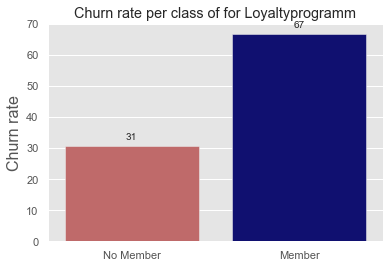

In [66]:
custom_palette_zon = ["indianred", "navy"]
crosstab= eda.make_crosstab(data, "nl_fdz_organisch") 
g = sns.barplot(data=crosstab, x="nl_fdz_organisch", y="True_per", palette=custom_palette_zon)
g.set_xlabel("", size=16)
g.set_ylabel("Churn rate", size=16)
g.set_xticklabels(["No Member", "Member"])
eda.add_count(g)
plt.title(f"Churn rate per class of for Loyaltyprogramm")
plt.show()

This graph has to be interpreted with caution, because of the non-significant number of persons, who are in this lolalty programm

**nl_blacklist_sum, nl_bounced_sum and nl_sperrliste_sum**

Here the **blacklist entries** and the **number of bounces** is inspecetd

In [67]:
data_nl.columns

Index(['nl_zeitbrief', 'nl_zeitshop', 'nl_zeitverlag_hamburg',
       'nl_fdz_organisch', 'nl_blacklist_sum', 'nl_bounced_sum',
       'nl_aktivitaet', 'nl_registrierung_min', 'nl_sperrliste_sum',
       'nl_opt_in_sum'],
      dtype='object')

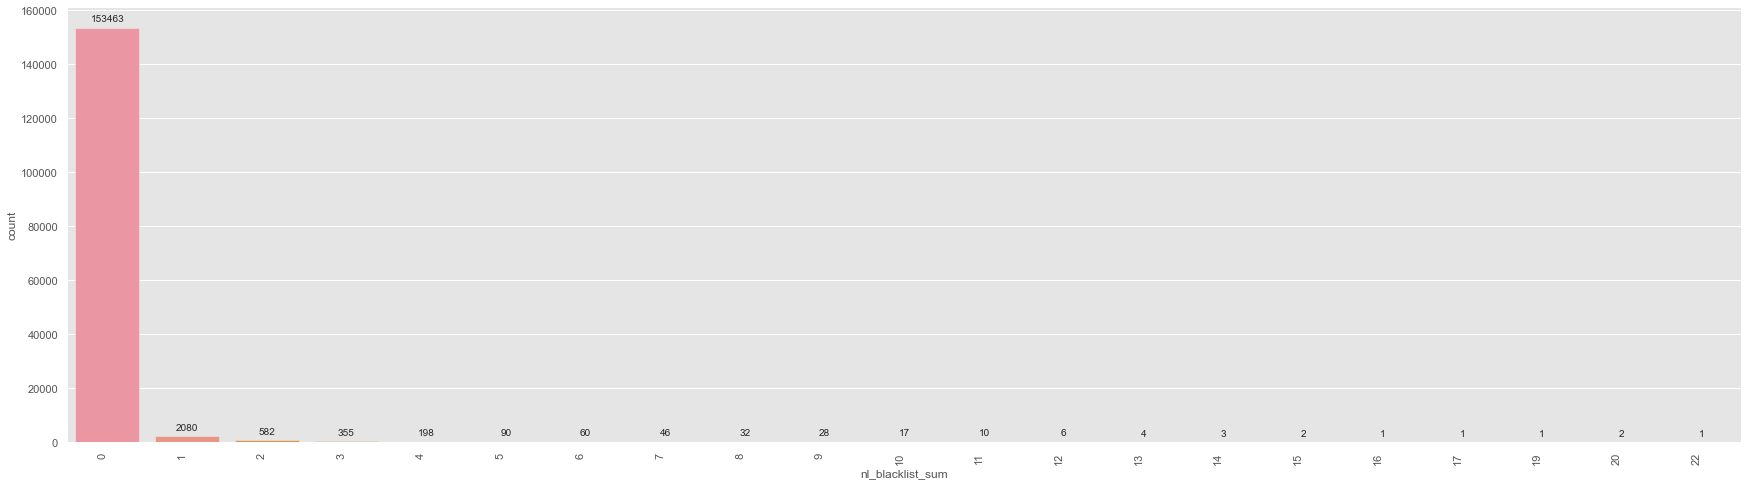

In [68]:
plt.figure(figsize=(30,8))
f = sns.countplot(x=data_nl.nl_blacklist_sum, data=data_nl);
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
eda.add_count(f)

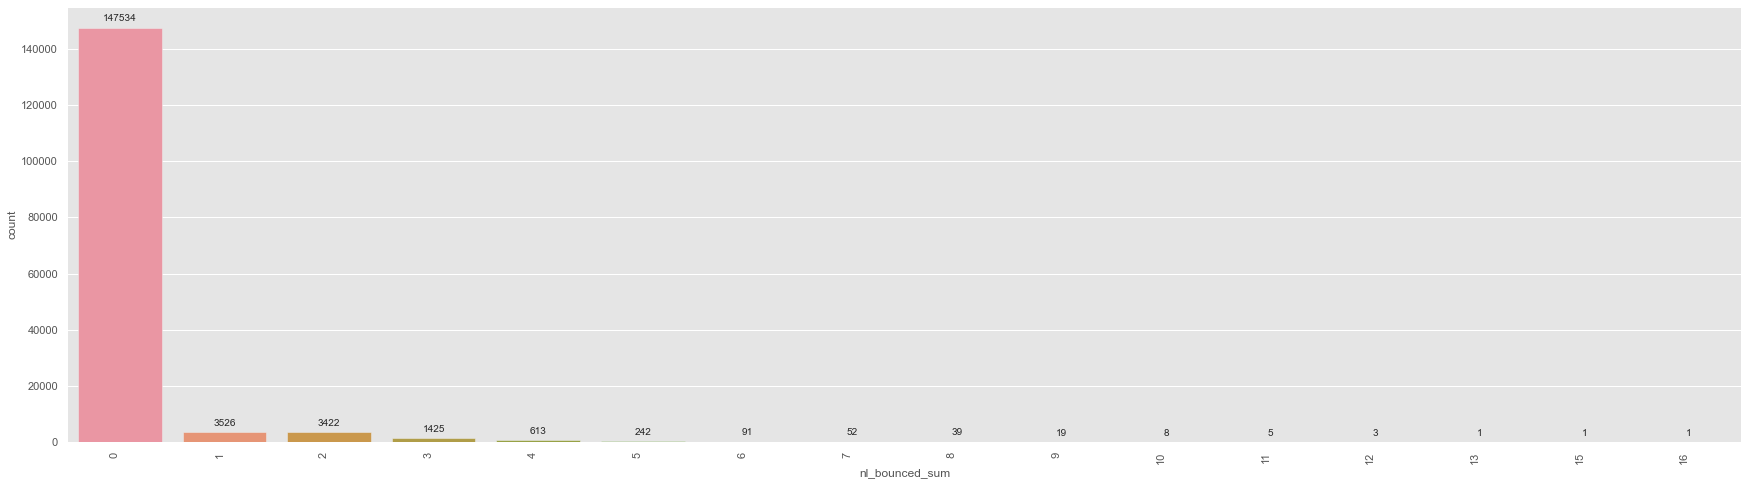

In [69]:
plt.figure(figsize=(30,8))
f = sns.countplot(x=data_nl.nl_bounced_sum, data=data_nl);
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
eda.add_count(f)

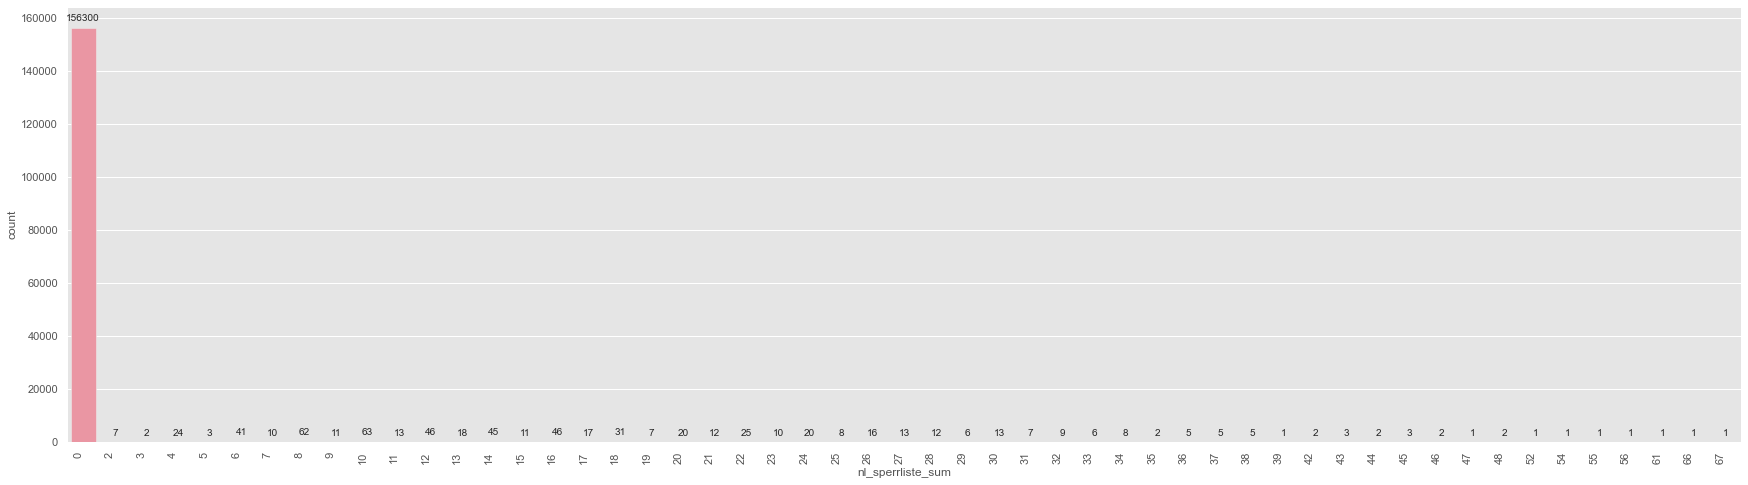

In [70]:
plt.figure(figsize=(30,8))
f = sns.countplot(x=data_nl.nl_sperrliste_sum, data=data_nl);
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
eda.add_count(f)

According to the graphs above, it makes sense to create new features for these three variables (sum > 0)

In [71]:
data_nl["nl_blacklist_sum_2"] = data_nl.nl_blacklist_sum.apply(lambda x: 1 if x >0 else 0)
data_nl["nl_bounced_sum_2"] = data_nl.nl_bounced_sum.apply(lambda x: 1 if x >0 else 0)
data_nl["nl_sperrliste_sum_2"] = data_nl.nl_sperrliste_sum.apply(lambda x: 1 if x >0 else 0)

In [72]:
# for plotting we need to do it like this (we need to include "churn")
data_nl_alternative = df
data_nl_alternative["nl_blacklist_sum_2"] = data_nl_alternative.nl_blacklist_sum.apply(lambda x: 1 if x >0 else 0)
data_nl_alternative["nl_bounced_sum_2"] = data_nl_alternative.nl_bounced_sum.apply(lambda x: 1 if x >0 else 0)
data_nl_alternative["nl_sperrliste_sum_2"] = data_nl_alternative.nl_sperrliste_sum.apply(lambda x: 1 if x >0 else 0)

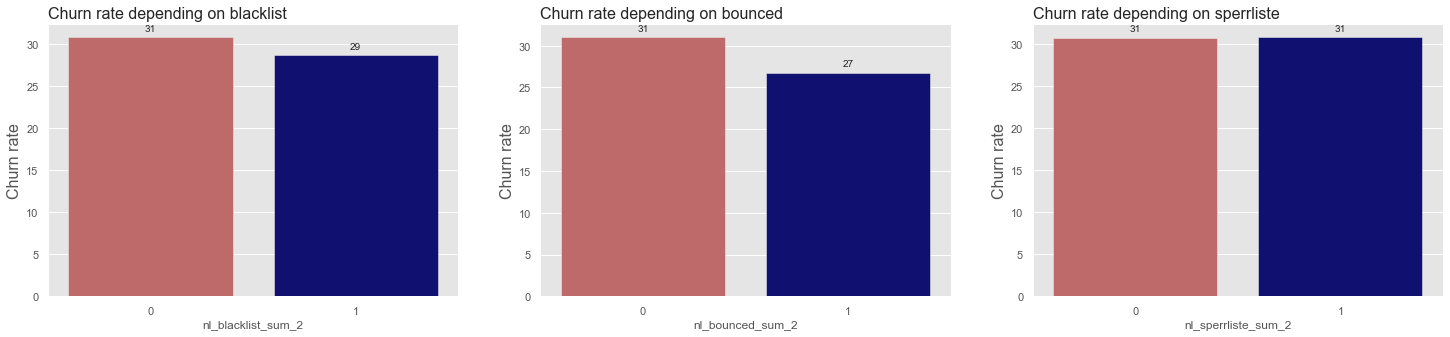

In [73]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))

crosstab1= eda.make_crosstab(data_nl_alternative, "nl_blacklist_sum_2") 
crosstab2= eda.make_crosstab(data_nl_alternative, "nl_bounced_sum_2")
crosstab3= eda.make_crosstab(data_nl_alternative, "nl_sperrliste_sum_2") 

g1 = sns.barplot(data=crosstab1, x= "nl_blacklist_sum_2", y="True_per", palette=custom_palette_zon, ax=axes[0])
g1.set_ylabel("Churn rate", size=16)
g1.set_title("Churn rate depending on blacklist", fontsize=16, loc="left");
eda.add_count(g1)


g2 = sns.barplot(data=crosstab2, x= "nl_bounced_sum_2", y="True_per", palette=custom_palette_zon, ax=axes[1])
g2.set_ylabel("Churn rate", size=16)
g2.set_title("Churn rate depending on bounced", fontsize=16, loc="left");
eda.add_count(g2)


g3 = sns.barplot(data=crosstab3, x= "nl_sperrliste_sum_2", y="True_per", palette=custom_palette_zon, ax=axes[2])
g3.set_ylabel("Churn rate", size=16)
g3.set_title("Churn rate depending on sperrliste", fontsize=16, loc="left");
eda.add_count(g3)

For ```nl_blacklist_sum_2```and ```nl_bounced_sum_2``` differences in churn rate can be found,  but not for ```nl_sperrliste_sum_2```

**nl_aktivitaet**

This feature contains the count of subscritions to Newsletters, not only for those in this dataset

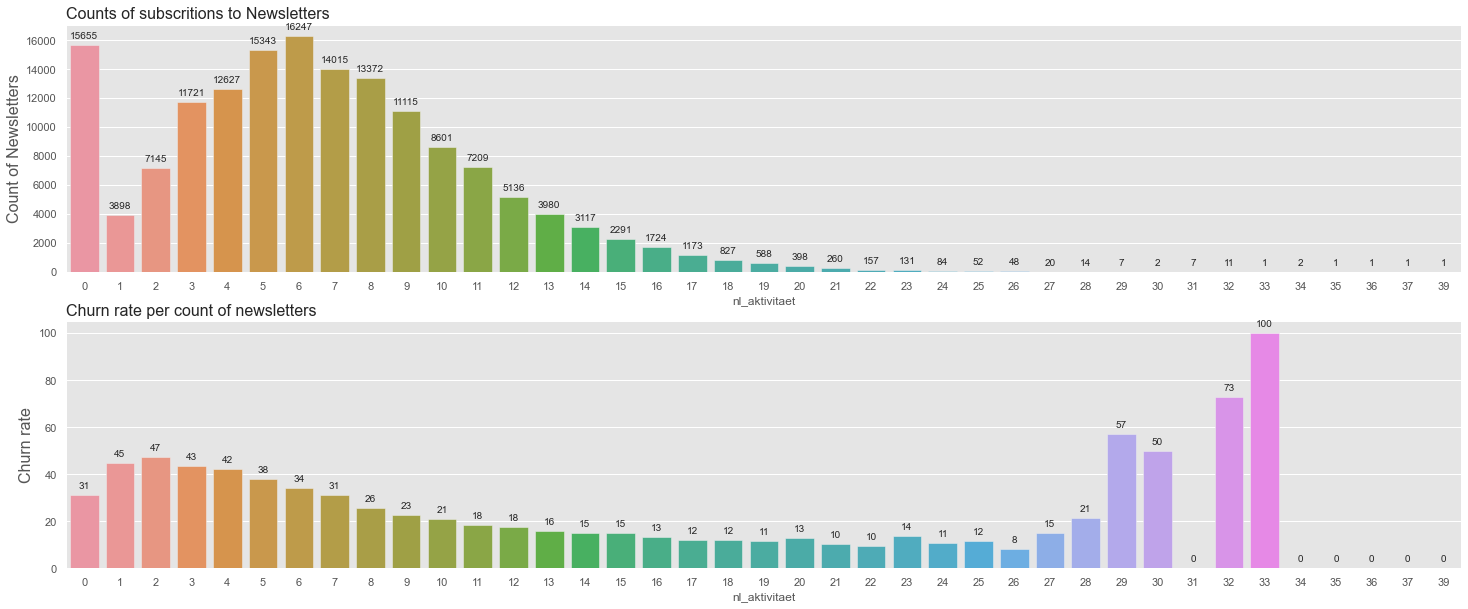

In [74]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(25, 10))
crosstab= eda.make_crosstab(df, "nl_aktivitaet")


f = sns.countplot(x=df.nl_aktivitaet, data=df, ax=axes[0]);
f.set_ylabel("Count of Newsletters", size=16)
f.set_title("Counts of subscritions to Newsletters", fontsize=16, loc="left");
eda.add_count(f)

g = sns.barplot(data=crosstab, x="nl_aktivitaet", y="True_per", ax=axes[1])
g.set_ylabel("Churn rate", size=16)
g.set_title(f"Churn rate per count of newsletters", loc="left", fontsize=16);
eda.add_count(g)

There are differences between the absolute counts and the relative values for churn rates. The max value for the absolute number of newsletters is 6, whereas the churn rate for the same number is compareably low.

In [75]:
data_nl["nl_registrierung_min_YEAR"] = data_nl["nl_registrierung_min"].apply(lambda x: x.split()[0].split("-")[0])
data_nl["nl_registrierung_min_MONTH"] = data_nl["nl_registrierung_min"].apply(lambda x: x.split()[0].split("-")[1])
data_nl["nl_registrierung_min_DAY"] = data_nl["nl_registrierung_min"].apply(lambda x: x.split()[0].split("-")[2])
data_nl = data_nl.sort_values(by=['nl_registrierung_min'])
data_nl

,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum,nl_blacklist_sum_2,nl_bounced_sum_2,nl_sperrliste_sum_2,nl_registrierung_min_YEAR,nl_registrierung_min_MONTH,nl_registrierung_min_DAY
85173,0,0,0,0,0,0,0,1900-01-01 00:00:00,0,0,0,0,0,1900,01,01
12439,0,0,0,0,0,0,0,1900-01-01 00:00:00,0,0,0,0,0,1900,01,01
12441,0,0,0,0,0,0,0,1900-01-01 00:00:00,0,0,0,0,0,1900,01,01
12442,0,0,0,0,0,0,0,1900-01-01 00:00:00,0,0,0,0,0,1900,01,01
54676,0,0,0,0,0,0,0,1900-01-01 00:00:00,0,0,0,0,0,1900,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45437,0,0,0,0,0,0,0,2020-07-19 00:00:00,0,0,0,0,0,2020,07,19
4323,0,0,0,0,0,0,0,2020-07-20 12:23:59,0,0,0,0,0,2020,07,20
43936,0,0,0,0,0,0,0,2020-07-20 14:14:23,0,0,0,0,0,2020,07,20
101432,0,0,0,0,0,0,0,2020-07-20 15:21:51,0,0,0,0,0,2020,07,20


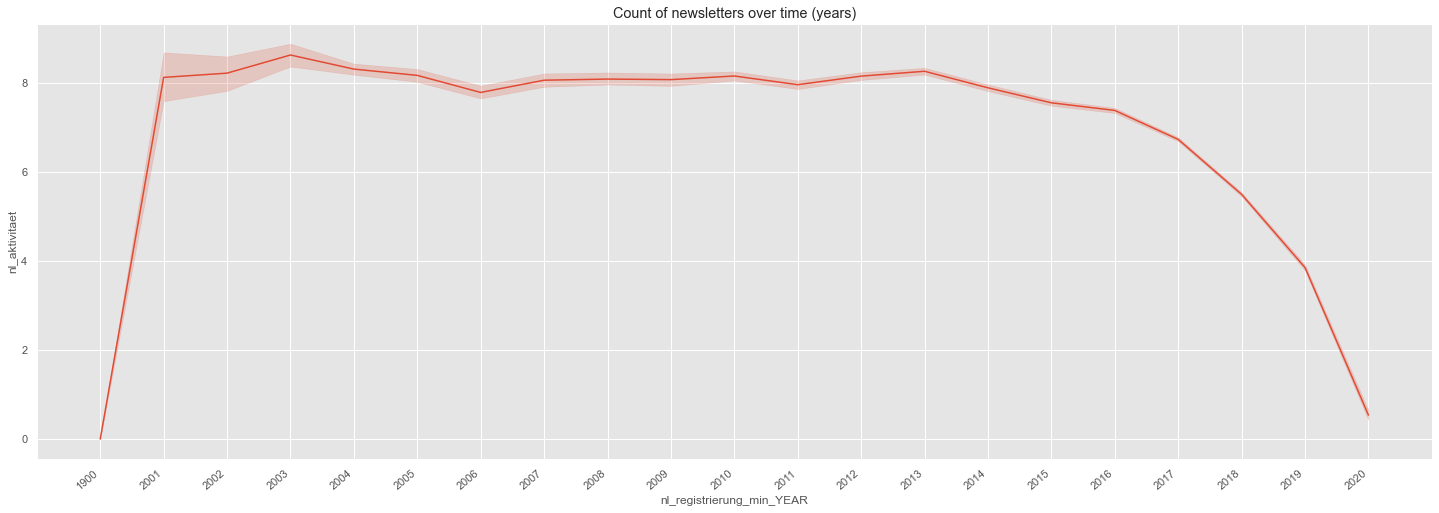

In [76]:
labels = sorted(list(set([i for i in data_nl["nl_registrierung_min_YEAR"]])))

plt.figure(figsize=(25,8))
plt.title("Count of newsletters over time (years)")
g = sns.lineplot(data=data_nl, x="nl_registrierung_min_YEAR", y="nl_aktivitaet")
g.set_xticklabels(labels, rotation=40, ha="right");

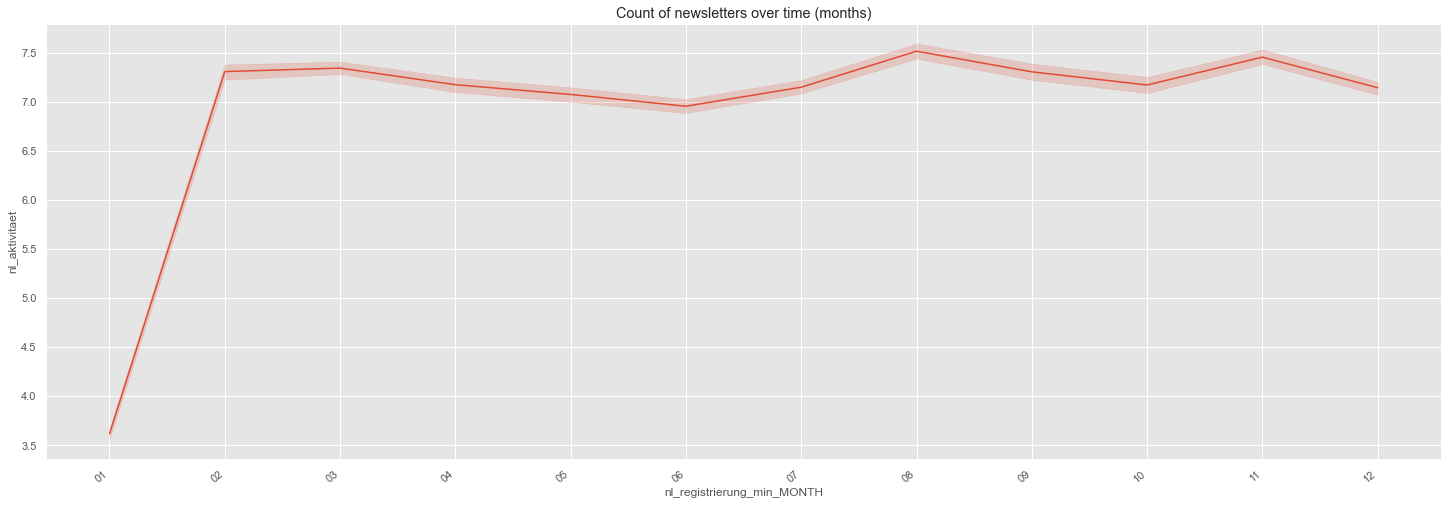

In [77]:
labels = sorted(list(set([i for i in data_nl["nl_registrierung_min_MONTH"]])))

plt.figure(figsize=(25,8))
plt.title("Count of newsletters over time (months)")
g = sns.lineplot(data=data_nl, x="nl_registrierung_min_MONTH", y="nl_aktivitaet")
g.set_xticklabels(labels, rotation=40, ha="right");

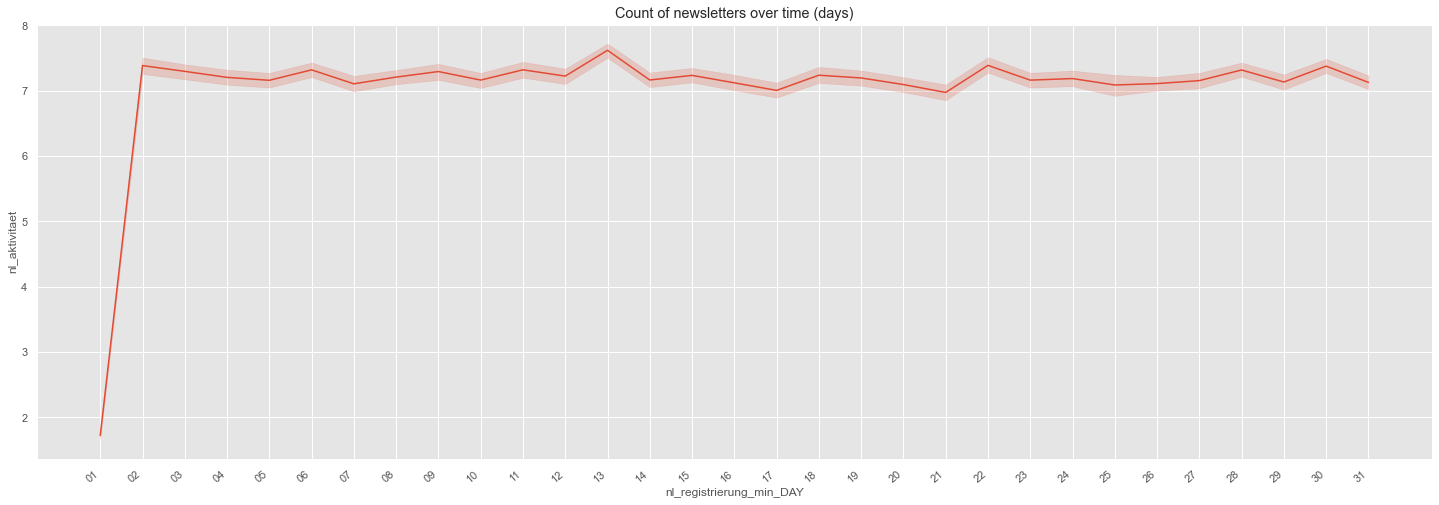

In [78]:
labels = sorted(list(set([i for i in data_nl["nl_registrierung_min_DAY"]])))

plt.figure(figsize=(25,8))
plt.title("Count of newsletters over time (days)")
g = sns.lineplot(data=data_nl, x="nl_registrierung_min_DAY", y="nl_aktivitaet")
g.set_xticklabels(labels, rotation=40, ha="right");

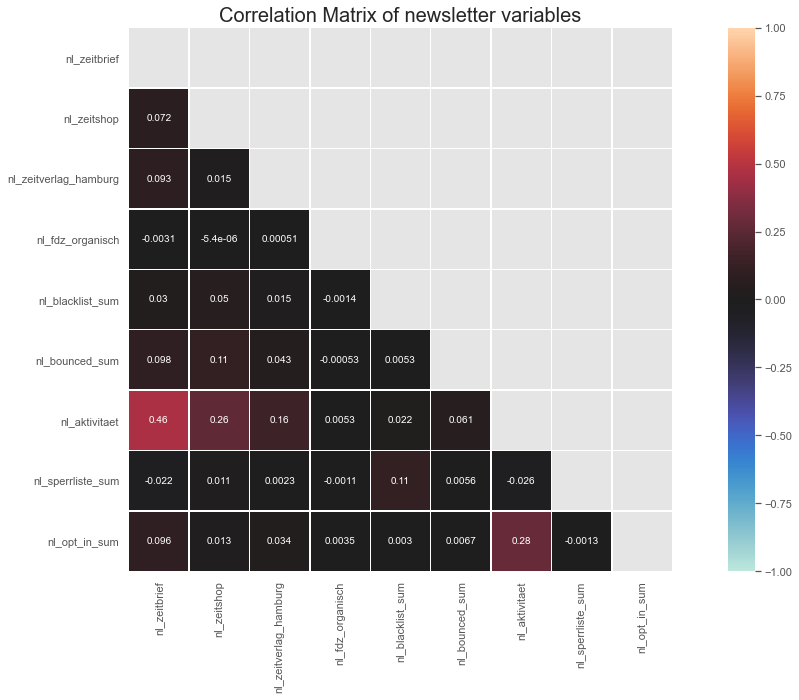

In [79]:
corr = data_nl.drop(["nl_registrierung_min", "nl_blacklist_sum_2", "nl_bounced_sum_2", "nl_sperrliste_sum_2", "nl_registrierung_min_YEAR"], axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True) (diverging not necessary)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, annot=True, vmin=-1, vmax=1, center= 0) #, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of newsletter variables', fontsize=20)
plt.show()

Apparently, die Zeit keeps track of newsletters only since 2001. From 2014, there is a decrease in the number of newsletters

### Reg-Data

This data shows, in which of these services a user is registraded. Values differ from 0 to 1.<br/> ```0 = not registered```<br/> ```1 = registered``` <br/><br/> 


In [80]:
data_reg.describe()

,boa_reg,che_reg,sit_reg,sso_reg
count,156982.000000,156982.000000,156982.000000,156982.000000
mean,0.073677,0.085284,0.072703,0.679715
std,0.261246,0.279304,0.259649,0.466588
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


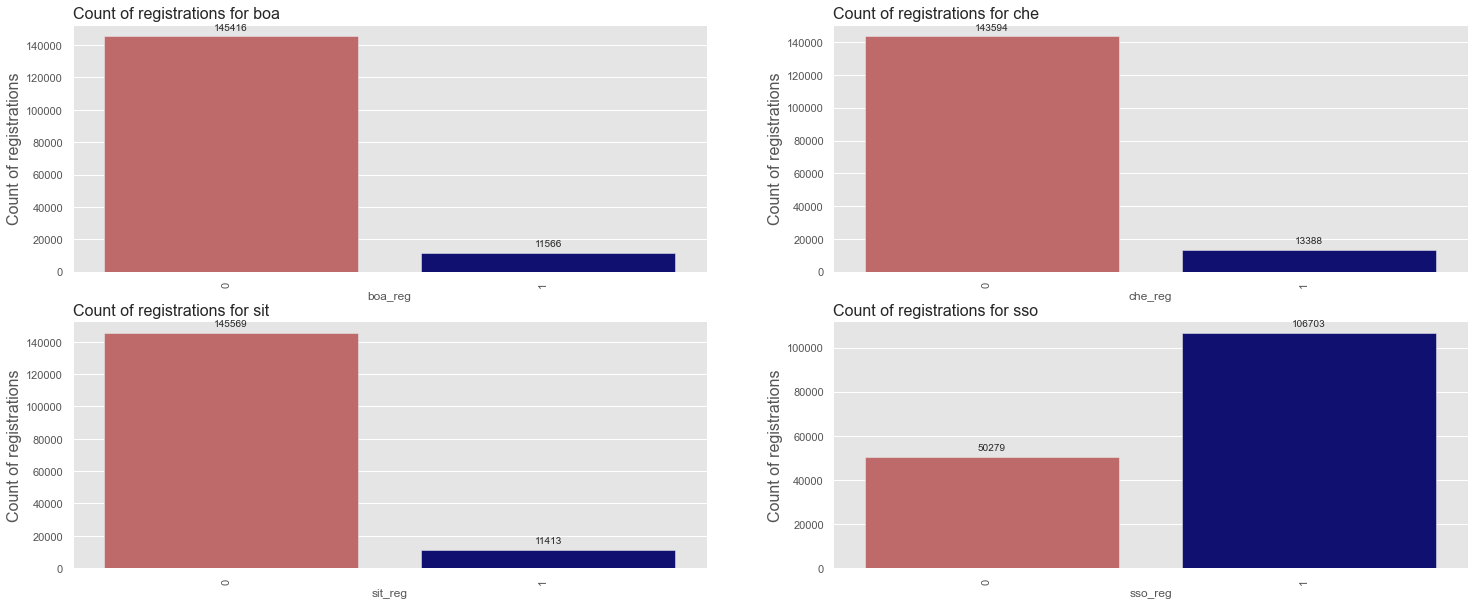

In [81]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(25, 10))

f = sns.countplot(x=data_reg.boa_reg, data=data_reg, palette=custom_palette_zon,ax=axes[0,0]);
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
f.set_ylabel("Count of registrations", size=16)
f.set_title("Count of registrations for boa", fontsize=16, loc="left");
eda.add_count(f)

f1 = sns.countplot(x=data_reg.che_reg, data=data_reg, palette=custom_palette_zon,ax=axes[0,1]);
f1.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
f1.set_ylabel("Count of registrations", size=16)
f1.set_title("Count of registrations for che", fontsize=16, loc="left");
eda.add_count(f1)

f2 = sns.countplot(x=data_reg.sit_reg, data=data_reg,palette=custom_palette_zon, ax=axes[1,0]);
f2.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
f2.set_ylabel("Count of registrations", size=16)
f2.set_title("Count of registrations for sit", fontsize=16, loc="left");
eda.add_count(f2)

f3 = sns.countplot(x=data_reg.sso_reg, data=data_reg, palette=custom_palette_zon, ax=axes[1,1]);
f3.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right");
f3.set_ylabel("Count of registrations", size=16)
f3.set_title("Count of registrations for sso", fontsize=16, loc="left");
eda.add_count(f3)

Only for ```sso_reg``` there are more registrations than users, who didn't register.

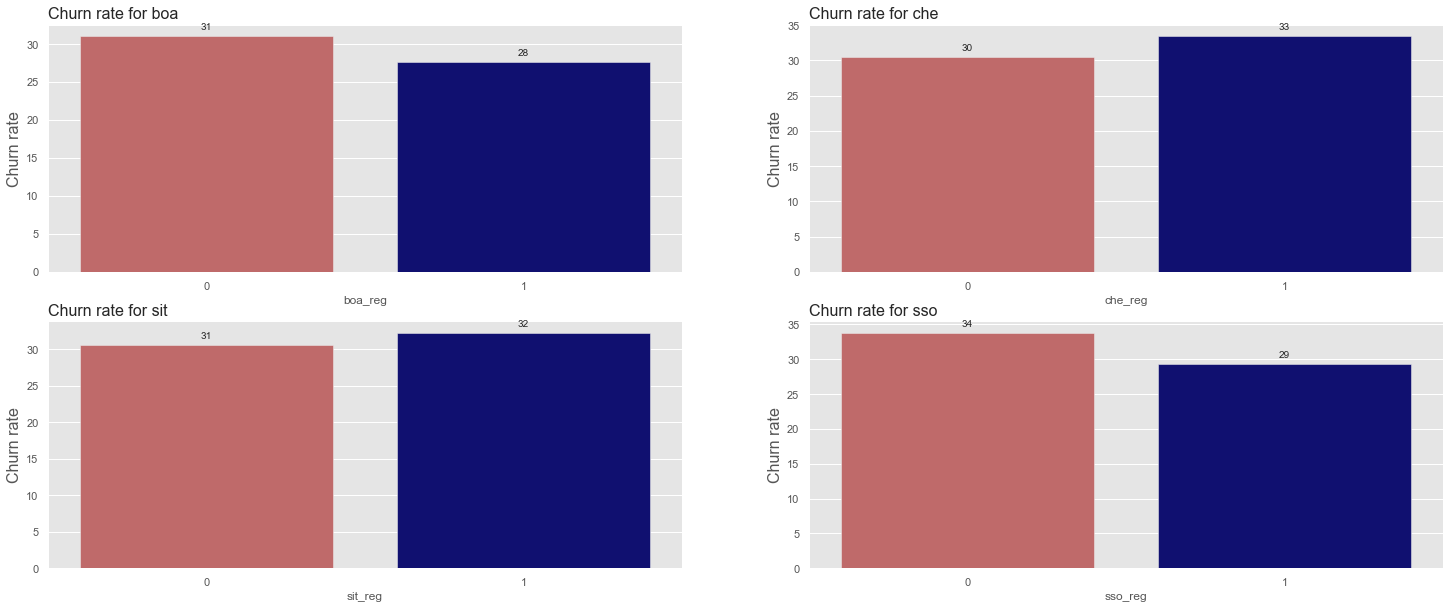

In [82]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(25, 10))
crosstab1= eda.make_crosstab(df, "boa_reg") 
crosstab2= eda.make_crosstab(df, "che_reg")
crosstab3= eda.make_crosstab(df, "sit_reg") 
crosstab4= eda.make_crosstab(df, "sso_reg") 

g1 = sns.barplot(data=crosstab1, x= "boa_reg", y="True_per", palette=custom_palette_zon, ax=axes[0,0])
g1.set_ylabel("Churn rate", size=16)
g1.set_title("Churn rate for boa", fontsize=16, loc="left");
eda.add_count(g1)


g2 = sns.barplot(data=crosstab2, x= "che_reg", y="True_per", palette=custom_palette_zon, ax=axes[0,1])
g2.set_ylabel("Churn rate", size=16)
g2.set_title("Churn rate for che", fontsize=16, loc="left");
eda.add_count(g2)


g3 = sns.barplot(data=crosstab3, x= "sit_reg", y="True_per", palette=custom_palette_zon, ax=axes[1,0])
g3.set_ylabel("Churn rate", size=16)
g3.set_title("Churn rate for sit", fontsize=16, loc="left");
eda.add_count(g3)

g4 = sns.barplot(data=crosstab4, x= "sso_reg", y="True_per", palette=custom_palette_zon, ax=axes[1,1])
g4.set_ylabel("Churn rate", size=16)
g4.set_title("Churn rate for sso", fontsize=16, loc="left");
eda.add_count(g4)

Except for ```sit_reg``` there can be differences observed regarding the churning rate. The most significant differences between registered users and non-registered users can be found for ```boa_reg``` and ```sso_reg```.

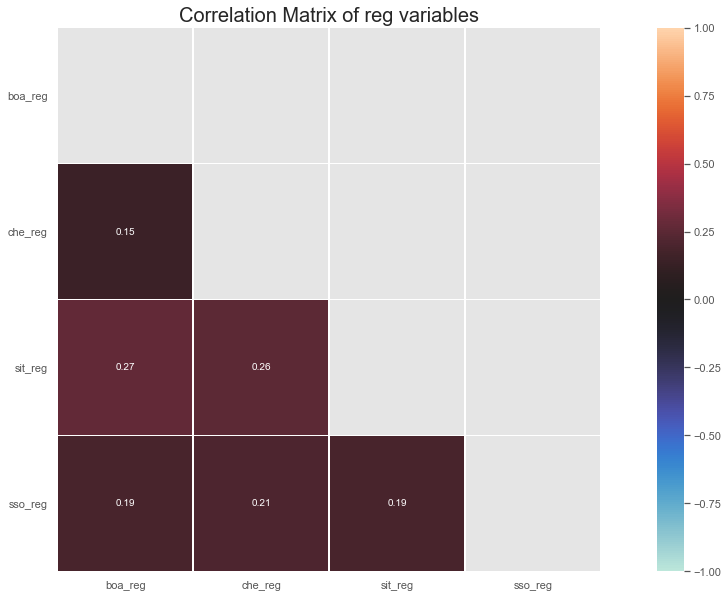

In [83]:
corr = data_reg.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True) (diverging not necessary)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, annot=True, vmin=-1, vmax=1, center= 0) #, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of reg variables', fontsize=20)
plt.show()

## GeoPandas

In [86]:
import geopandas as gpd

In [88]:
'''def crosstab_evaluation(feature_column,target_column,relative=True):
    crosstable = pd.crosstab(feature_column,target_column) 
    if relative:
        crosstable = crosstable.div(crosstable.sum(1),axis=0) 
    return crosstable'''

In [92]:
plz1_churn = eda.crosstab_evaluation(df.plz_1,df.churn)
plz2_churn = eda.crosstab_evaluation(df.plz_2,df.churn)
plz3_churn = eda.crosstab_evaluation(df.plz_3,df.churn)

In [87]:
plz_shape_df = gpd.read_file('/Users/kevintomas/Desktop/nf-sep-20/capstone andere/data/plz-gebiete.shp', dtype={'plz': str}) 
plz_shape_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plz       8706 non-null   object  
 1   note      8706 non-null   object  
 2   geometry  8706 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 204.2+ KB


In [88]:
 top_cities = {        
     'Berlin': (13.404954, 52.520008),
     'Cologne': (6.953101, 50.935173), 
     'Düsseldorf': (6.782048, 51.227144), 
     'Frankfurt am Main': (8.682127, 50.110924), 
     'Hamburg': (9.993682, 53.551086), 
     'Leipzig': (12.387772, 51.343479), 
     'Munich': (11.576124, 48.137154), 
     'Dortmund': (7.468554, 51.513400), 
     'Stuttgart': (9.181332, 48.777128), 
     'Nuremberg': (11.077438, 49.449820), 
     'Hannover': (9.73322, 52.37052)
}

In [89]:
plz_region_df = pd.read_csv( 
    '/Users/kevintomas/Desktop/nf-sep-20/capstone andere/data/zuordnung_plz_ort.csv', sep=',',
    dtype={'plz': str}
)
plz_region_df.drop('osm_id', axis=1, inplace=True) 
plz_region_df.head()

,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


In [90]:
 # Merge data.
germany_df = pd.merge( 
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz', 
    how='inner'
)
germany_df.drop(['note'], axis=1, inplace=True)

In [94]:
'''def convert_plz_1_to_prob(plz):
    index = str(plz)[0]
    value = plz1_churn.iloc[int(index),1] 
    return value

def convert_plz_2_to_prob(plz):
    index = str(plz)[0:2]
    value = plz2_churn[plz2_churn.index == index].iloc[0,1] 
    return value

def convert_plz_3_to_prob(plz):
    index = str(plz)[0:3]
    value = plz3_churn[plz3_churn.index == index].iloc[0,1] 
    return value'''

In [97]:
germany_df['churn_plz_1'] = germany_df.plz.apply(lambda x:eda.convert_plz_1_to_prob(x))
germany_df['churn_plz_2'] = germany_df.plz.apply(lambda x:eda.convert_plz_2_to_prob(x))
germany_df['churn_plz_3'] = germany_df.plz.apply(lambda x:eda.convert_plz_3_to_prob(x))

NameError: name 'plz1_churn' is not defined

In [96]:
plz_einwohner_df = pd.read_csv( 
    '/Users/kevintomas/Desktop/nf-sep-20/capstone andere/data/plz_einwohner.csv',
    sep=',',
    dtype={'plz': str, 'einwohner': int}
) 
plz_einwohner_df.head()

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14811
3,01099,28021
4,01108,5876


In [97]:
germany_df = pd.merge( 
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left' 
)

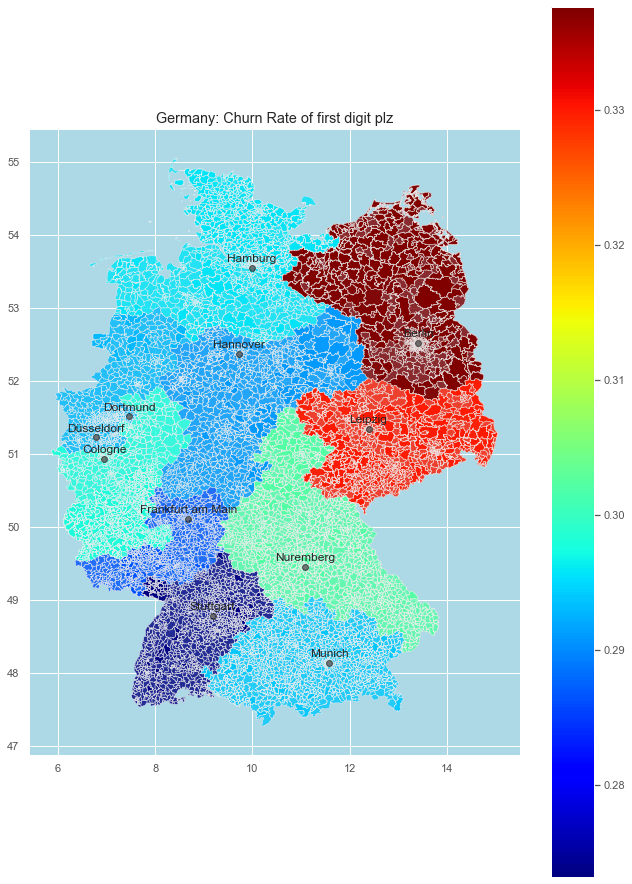

In [98]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot( 
    ax=ax,
    column='churn_plz_1', 
    categorical=False, 
    legend=True, 
    cmap='jet', 
    alpha=0.8,
)

for c in top_cities.keys():
    
    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c,
        fontsize=12,
        ha='center',
    )
    
    
    ax.plot( 
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o', 
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first digit plz', 
    aspect=1.5,
    facecolor='lightblue'
); 
#fig.savefig('plots/churn_rate_landscape_plz_1_digit.png',dpi=300)

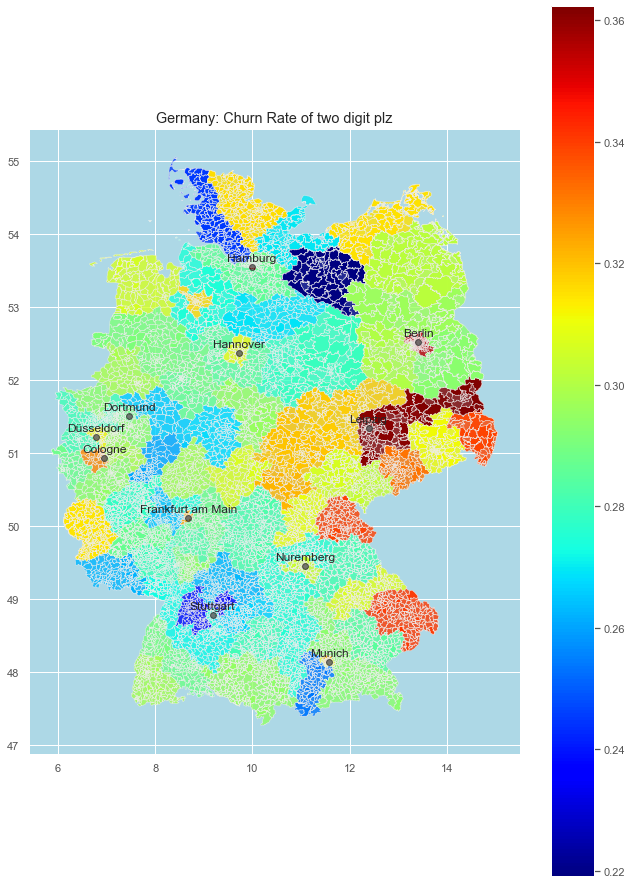

In [99]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot( 
    ax=ax,
    column='churn_plz_2', 
    categorical=False, 
    legend=True, 
    cmap='jet', 
    alpha=0.8,
)

for c in top_cities.keys():
    
    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c,
        fontsize=12,
        ha='center',
    )
    
    
    ax.plot( 
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o', 
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of two digit plz', 
    aspect=1.5,
    facecolor='lightblue'
); 
#fig.savefig('plots/churn_rate_landscape_plz_1_digit.png',dpi=300)

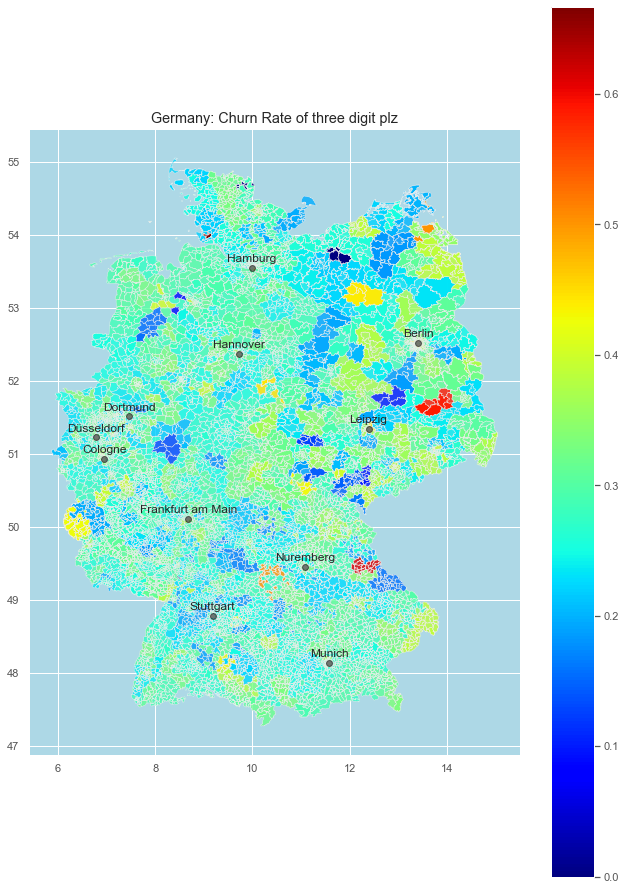

In [100]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot( 
    ax=ax,
    column='churn_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet', 
    alpha=0.8,
)

for c in top_cities.keys():
    
    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c,
        fontsize=12,
        ha='center',
    )
    
    
    ax.plot( 
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o', 
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of three digit plz', 
    aspect=1.5,
    facecolor='lightblue'
); 
#fig.savefig('plots/churn_rate_landscape_plz_1_digit.png',dpi=300)